<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-оттока-клиентов." data-toc-modified-id="Анализ-оттока-клиентов.-1">Анализ оттока клиентов.</a></span><ul class="toc-item"><li><span><a href="#Презентация:" data-toc-modified-id="Презентация:-1.1">Презентация:</a></span></li></ul></li><li><span><a href="#Шаг-1.-Предобработка-данных." data-toc-modified-id="Шаг-1.-Предобработка-данных.-2">Шаг 1. Предобработка данных.</a></span></li><li><span><a href="#Шаг-2.-Исследовательский-анализ-данных." data-toc-modified-id="Шаг-2.-Исследовательский-анализ-данных.-3">Шаг 2. Исследовательский анализ данных.</a></span><ul class="toc-item"><li><span><a href="#1.-Посчитаем-общий-процент-оттока-и-статистические-характеристики-датасета." data-toc-modified-id="1.-Посчитаем-общий-процент-оттока-и-статистические-характеристики-датасета.-3.1">1. Посчитаем общий процент оттока и статистические характеристики датасета.</a></span></li><li><span><a href="#2.-Построим-boxplot'ы,-гистограммы-и-изучим-выбросы." data-toc-modified-id="2.-Построим-boxplot'ы,-гистограммы-и-изучим-выбросы.-3.2">2. Построим boxplot'ы, гистограммы и изучим выбросы.</a></span></li><li><span><a href="#3.-Посчитаем-проценты-оттока-по-параметрам-в-которых-есть-различия." data-toc-modified-id="3.-Посчитаем-проценты-оттока-по-параметрам-в-которых-есть-различия.-3.3">3. Посчитаем проценты оттока по параметрам в которых есть различия.</a></span></li><li><span><a href="#4.-Исследование-&quot;хорошего&quot;-и-&quot;плохого&quot;-клиентов." data-toc-modified-id="4.-Исследование-&quot;хорошего&quot;-и-&quot;плохого&quot;-клиентов.-3.4">4. Исследование "хорошего" и "плохого" клиентов.</a></span></li></ul></li><li><span><a href="#Шаг-3.-Формулировка-и-проверка-гипотез." data-toc-modified-id="Шаг-3.-Формулировка-и-проверка-гипотез.-4">Шаг 3. Формулировка и проверка гипотез.</a></span><ul class="toc-item"><li><span><a href="#1.-Сформулируем-гипотезы." data-toc-modified-id="1.-Сформулируем-гипотезы.-4.1">1. Сформулируем гипотезы.</a></span></li><li><span><a href="#2.-Проверим-гипотезы." data-toc-modified-id="2.-Проверим-гипотезы.-4.2">2. Проверим гипотезы.</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации." data-toc-modified-id="Выводы-и-рекомендации.-5">Выводы и рекомендации.</a></span></li></ul></div>

# Анализ оттока клиентов.

Целью проекта является выяснение причин оттока клиентов. Заказчиком является менеджер продукта. Для выполнения цели необходимо решить следующие задачи: <div>1. Посчитать общий процент оттока.
<div>2. Провести исследовательский анализ. Сформировать типичные портреты клиентов: выделить несколько наиболее ярких категорий и посчитать по ним процент оттока.
<div>3. Выдвинуть и проверить гипотезы.
<div>4. Сформулировать выводы о причинах оттока клиентов. 
<div>Данные для работы предоставляются периодически. Привязка данных к временному интервалу или их давность значения не имеют. 

## Презентация:

Презентация:https://drive.google.com/file/d/1uJu1sgbQ8aByVPoqKEMF2iRWd7y8Xk_h/view?usp=sharing

In [1]:
#импортируем библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import math

In [2]:
#читаем датасет
#data = pd.read_csv('/datasets/bank_dataset.csv')
data = pd.read_csv('D:\\Обучение\\Аналитик данных\\dataset_ya.practicum\\bank_dataset.csv')


# Шаг 1. Предобработка данных. 

In [3]:
#функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма, 
#а также явных дубликатов
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    count_duplicates = df.duplicated().sum()
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing,
                                     'num_duplicates': count_duplicates})
    
    return missing_value_df


#функция для вывода информации о файле
def df_info (df_data):
    print('Количество строк файла:', df_data.shape[0])
    print('Количество столбцов файла:', df_data.shape[1])
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках и явных дубликатах данных:')
    display(nan_values(df_data))
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())


In [4]:
df_info(data)

Количество строк файла: 10000
Количество столбцов файла: 12

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
userid,"[15677338, 15690047, 15662040, 15744090, 15780...",int64,10000
score,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ...",int64,460
Age,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...",int64,70
Objects,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]",int64,11
Products,"[1, 3, 2, 4]",int64,4
CreditCard,"[1, 0]",int64,2
Loyalty,"[1, 0]",int64,2
Churn,"[1, 0]",int64,2
Balance,"[nan, 83807.86, 159660.8, 125510.82, 113755.78...",float64,6381
estimated_salary,"[101348.88, 112542.58, 113931.57, 93826.63, 79...",float64,9999



Информация о пропусках и явных дубликатах данных:


,column_name,num_missing,percent_missing,num_duplicates
userid,userid,0,0.00,0
score,score,0,0.00,0
City,City,0,0.00,0
Gender,Gender,0,0.00,0
Age,Age,0,0.00,0
Objects,Objects,0,0.00,0
Balance,Balance,3617,36.17,0
Products,Products,0,0.00,0
CreditCard,CreditCard,0,0.00,0
Loyalty,Loyalty,0,0.00,0



Первые пять строк таблицы:


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


В колонке Balance более 1/3 пропуски. В других колонках пропусков нет. Предполагаю, что ряд клиентов не хочет чтобы кто-то посторонний видел их баланс. Если человек не хочет, чтобы баланс видели, то он вероятно выше среднего или медианного и не ноль, поэтому заполнять нет смысла. 

Явных дубликатов нет. 

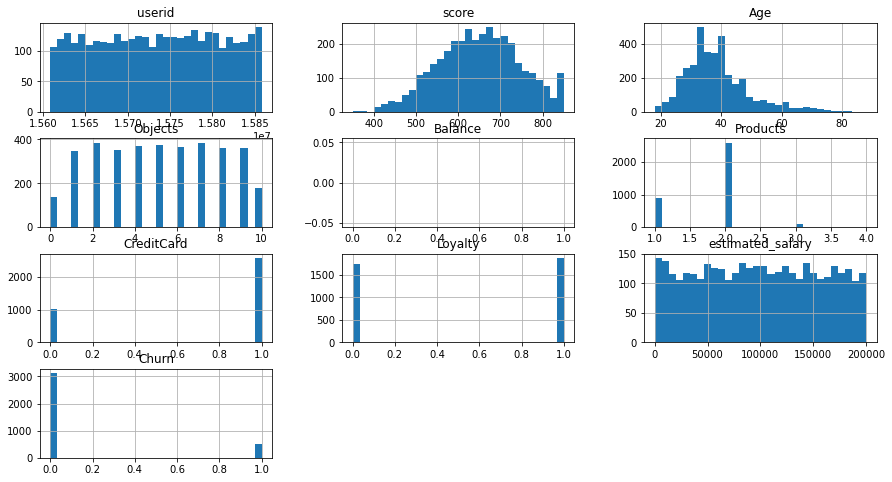

In [5]:
#выделим строки с неуказанным балансом
no_balance = data[pd.isnull(data['Balance'])]
#посмотрим распределения по столбцам для этого датаферйма
no_balance.hist(bins = 30, figsize = (15,8));

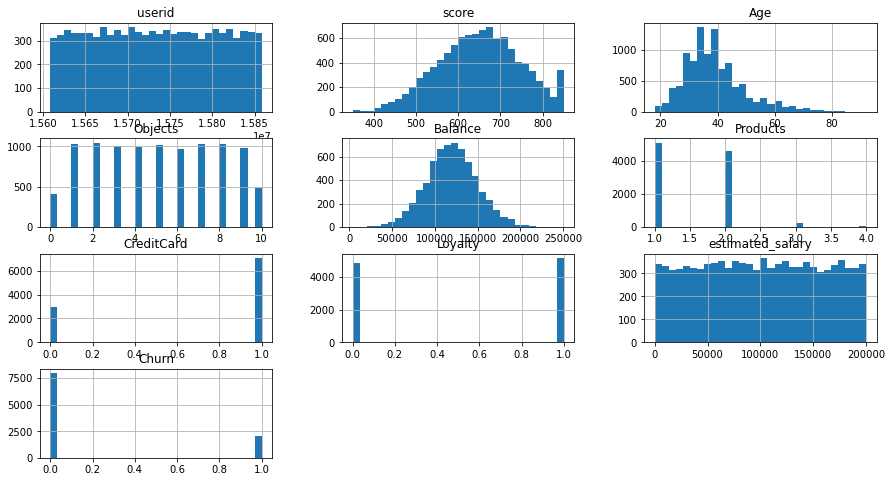

In [6]:
# сравним с распределениями всего датафрейма
data.hist(bins = 30, figsize = (15,8));

Различие данных с пропущенными значениями баланса и всего датасета имеется по параметру "Количество продуктов". Те кто не указал баланс чаще пользуются двумя продуктами, а для всех данных частота использования 1о и 2х продуктов одинакова. Использование кредита, как второго продукта отметаю, т.к. частоты наличия/отсутствия кредитных карт схожи для обоих датасетов.  

# Шаг 2. Исследовательский анализ данных. 

## 1. Посчитаем общий процент оттока и статистические характеристики датасета.

In [7]:
total_churn = round(len(data.query('Churn == 1'))/len(data)*100, 1)
total_churn

20.4

In [8]:
#посчитаем процент оттока для тех кто баланс не указал
no_balance_churn = round(len(no_balance.query('Churn == 1'))/len(no_balance)*100, 1)
no_balance_churn

13.8

Теперь можно сказать, что не указавшие баланс меньше склонны к оттоку. Учитывая, что они еще и пользуются большим количеством продуктов, то вероятно это получатели зарплат, имеющие зарплатную карту. 

In [9]:
data.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Отмечу, что для возраста, количества продуктов, наличия кредитных карт и активности значения средней и медиан отличаются. Это говорит о том, что данные для этих параметров скошены.  

## 2. Построим boxplot'ы, гистограммы и изучим выбросы.

Text(0, 0.5, 'Кредитный рейтинг')

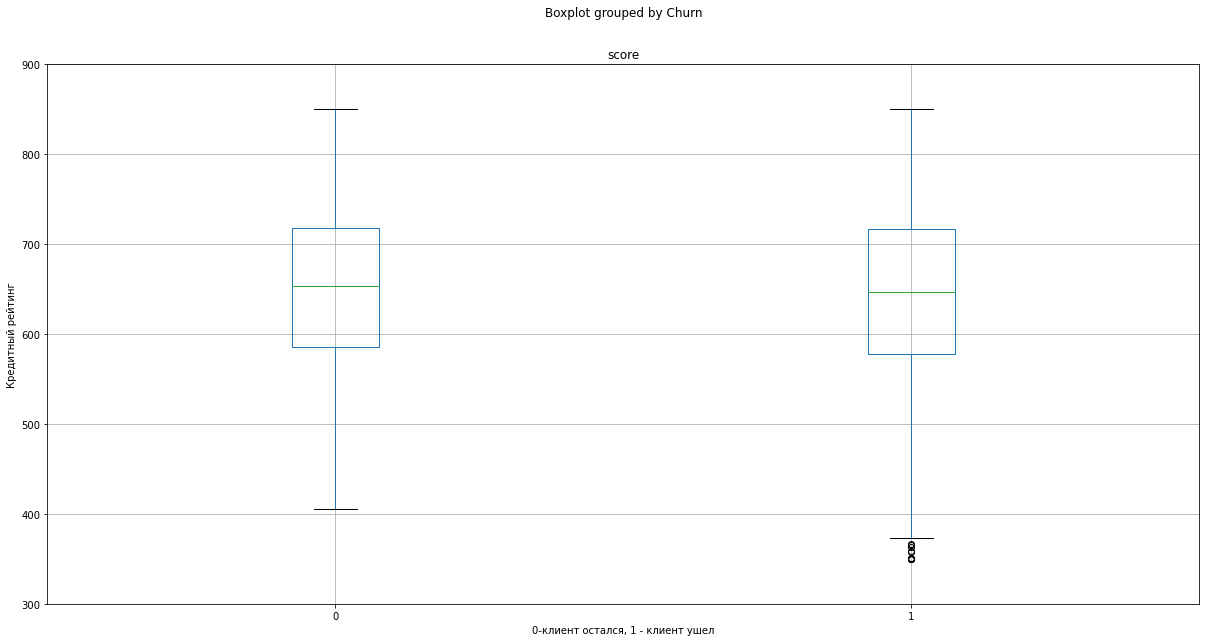

In [10]:
#для кредитного рейтинга
data.boxplot(column = 'score', by = 'Churn', figsize=(20, 10))
plt.ylim(300, 900) #подогнал интервал чтобы все данные уместились, а лишнего поля не было. 
plt.xlabel('0-клиент остался, 1 - клиент ушел')
plt.ylabel('Кредитный рейтинг')

По кредитному рейтингу очень равномерно распределены данные. Медианы для оставшихся и ушедших практически равны (около 650), поэтому уже можно сделать вывод, что по кредитному рейтингу отличий между ушедшими и оставшимися не увидим. Выбросы для ушедших очень близки к 1,5 межквартильного размаха от первого квартиля и их немного, поэтому ими можно пренебречь в случае кредитного рейтинга.  

Text(0, 0.5, 'Возраст, лет')

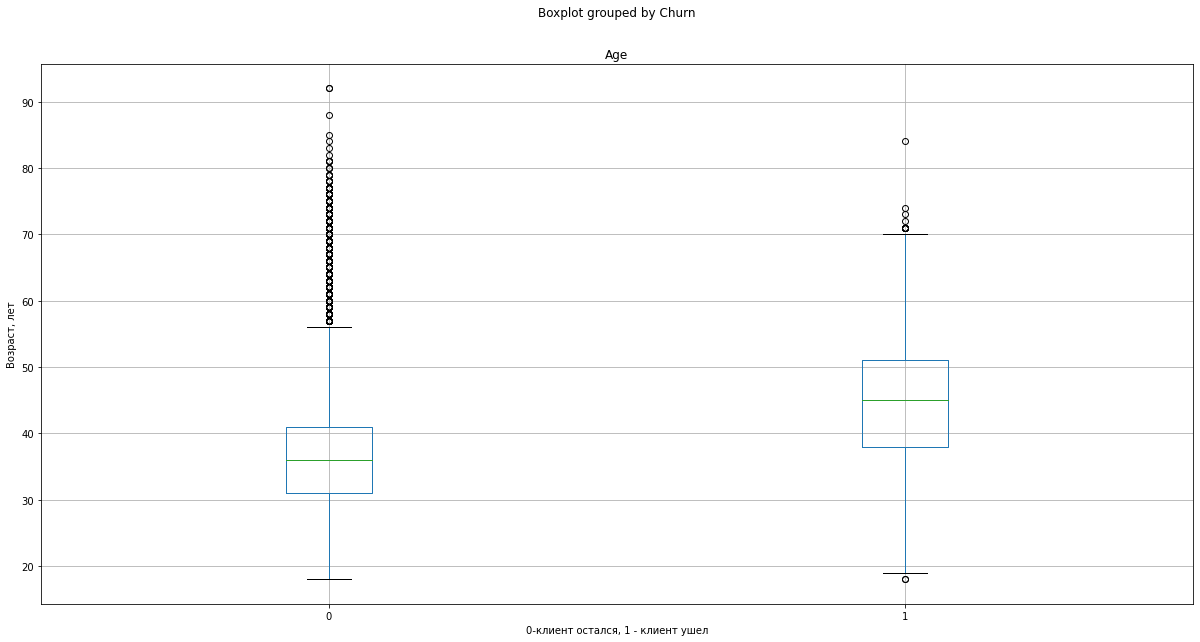

In [11]:
#для возраста
data.boxplot(column = 'Age', by = 'Churn', figsize=(20, 10))
plt.xlabel('0-клиент остался, 1 - клиент ушел')
plt.ylabel('Возраст, лет')

Выбросов для оставшихся много. Но они не аномальные, т.к. они просто констатируют факт, что людей в возрасте 70+ мало. Для ушедших выбросов немного и возраст распределен более равномерно. Заметна разница в медианных значениях: для оставшихся в районе 35-37 лет, а для ушедших в районе 45 лет. Но это не указывает на то, что уходят те кому больше лет. При этом общая медиана по датасету 37 лет.   

Text(0, 0.5, 'Количество объектов в собственности, шт')

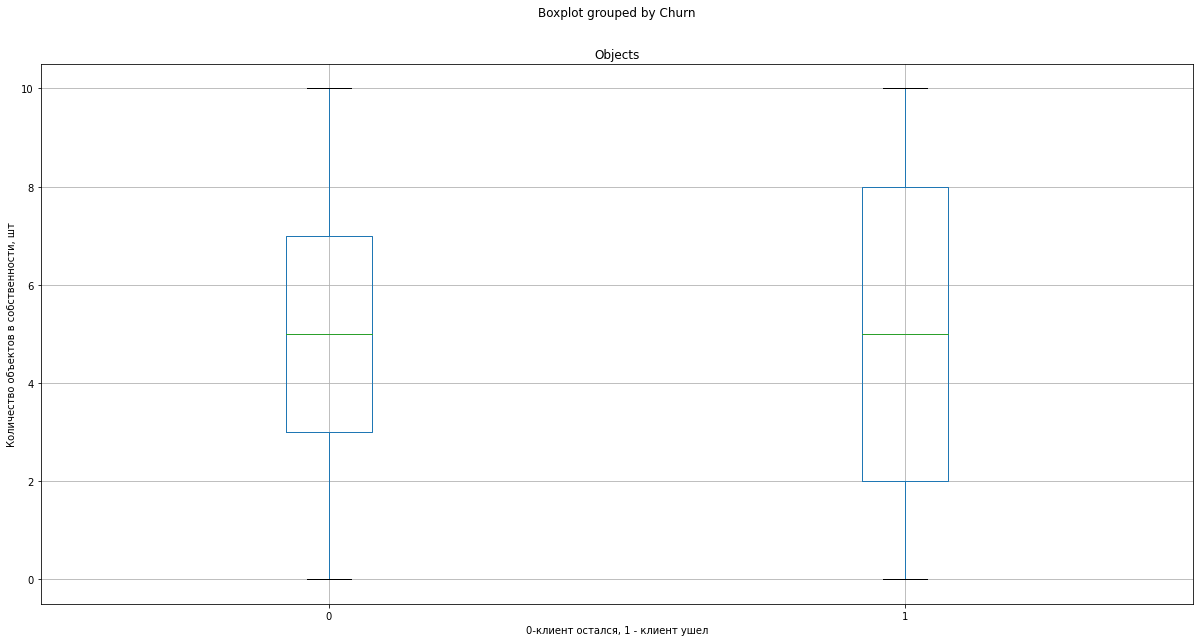

In [12]:
#для количества объектов в собственнности
data.boxplot(column = 'Objects', by = 'Churn', figsize=(20, 10))
plt.xlabel('0-клиент остался, 1 - клиент ушел')
plt.ylabel('Количество объектов в собственности, шт')

По количеству объектов очень равномерно распределены данные. Медианы для оставшихся и ушедших практически равны (около 5), поэтому уже можно сделать вывод, что по количеству объектов отличий между ушедшими и оставшимися не увидим. 

Text(0, 0.5, 'Баланс на счете')

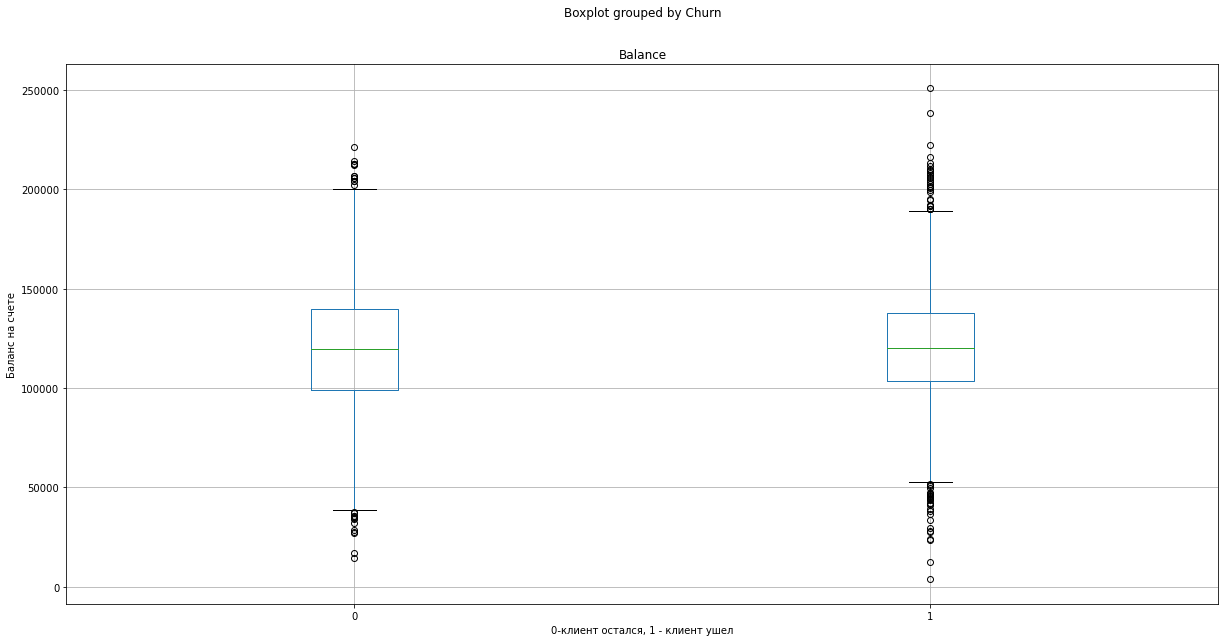

In [13]:
#для баланса на счете
data.boxplot(column = 'Balance', by = 'Churn', figsize=(20, 10))
plt.xlabel('0-клиент остался, 1 - клиент ушел')
plt.ylabel('Баланс на счете')

По балансу на счету распределения для ушедших и оставшихся очень похожи и находятся в пределах одного интервала данных. В обоих случаях есть выбросы.  Медианы для оставшихся и ушедших практически равны, поэтому уже можно сделать вывод, что по балансу на счете отличий между ушедшими и оставшимися не увидим. 

Text(0, 0.5, 'Заработная плата клиента')

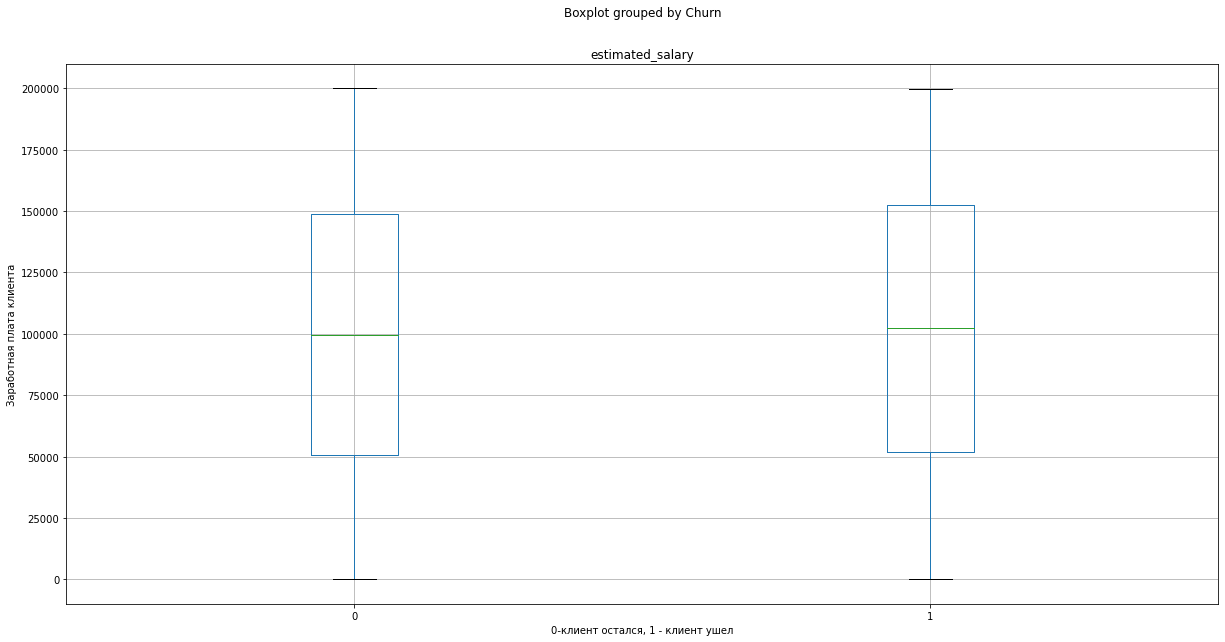

In [14]:
#для заработной платы клиента
data.boxplot(column = 'estimated_salary', by = 'Churn', figsize=(20, 10))
plt.xlabel('0-клиент остался, 1 - клиент ушел')
plt.ylabel('Заработная плата клиента')


По заработной плате выбросы отсутствуют. Данные распределены очень равномерно. Медианы для ушедших и оставшихся практически равны. 

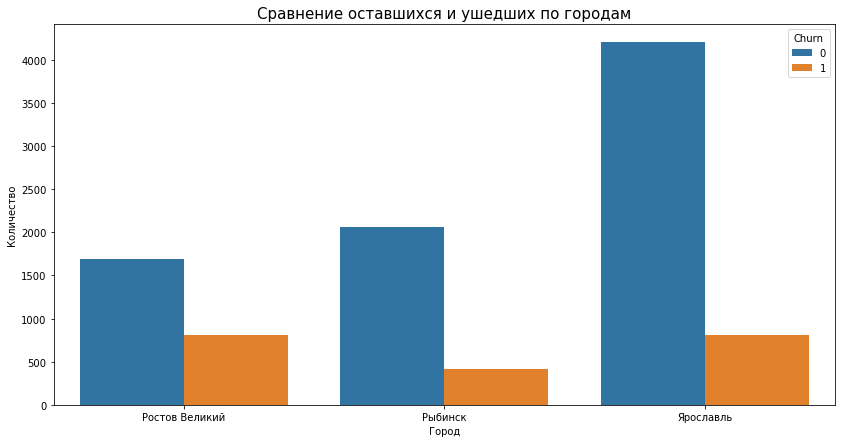

In [15]:
#построим распределение для городов
city = data.groupby(['City', 'Churn'])['userid'].count().reset_index()
#построим гистограммы для городов
fig = plt.figure()
sns.barplot(x="City", y="userid", hue="Churn", data=city)
plt.title("Сравнение оставшихся и ушедших по городам", fontsize = 15) 
plt.xlabel('Город')
plt.ylabel('Количество')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()

Ростов Великий явный лидер по оттоку клиентов. Процент общего оттока 20,4%, а здесь оранжевый столбец дотягивает до половины синего, что значит, что примерно 30-40% процентов клиентов в Ростове Великом уходят. Рыбинск и Ярославль имеют равнозначную картину по оттоку клиентов. Нужно будет считать точный %оттока клиентов по городам.  

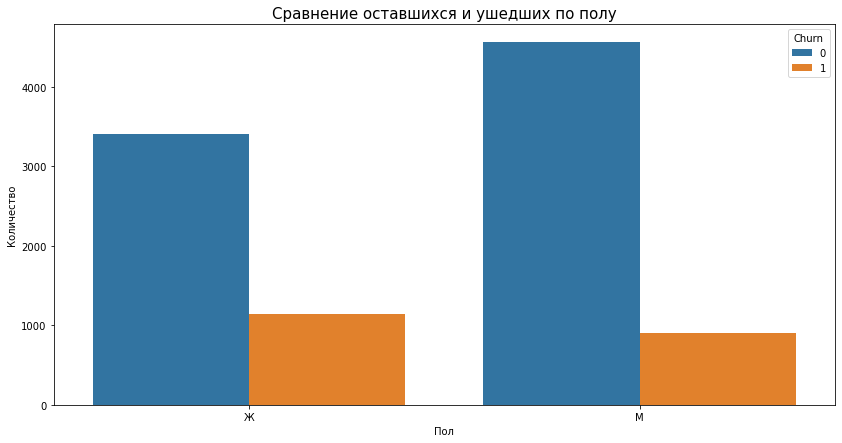

In [16]:
#построим распределение для пола
gender = data.groupby(['Gender', 'Churn'])['userid'].count().reset_index()
#построим гистограммы для пола
fig = plt.figure()
sns.barplot(x="Gender", y="userid", hue="Churn", data=gender)
plt.title("Сравнение оставшихся и ушедших по полу", fontsize = 15) 
plt.xlabel('Пол')
plt.ylabel('Количество')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()

Визуально видно, что женщины уходят больше, т.к. различие между высотой столбцов меньше, чем для мужчин. Нужно посчитать точный %оттока клиентов по полу.

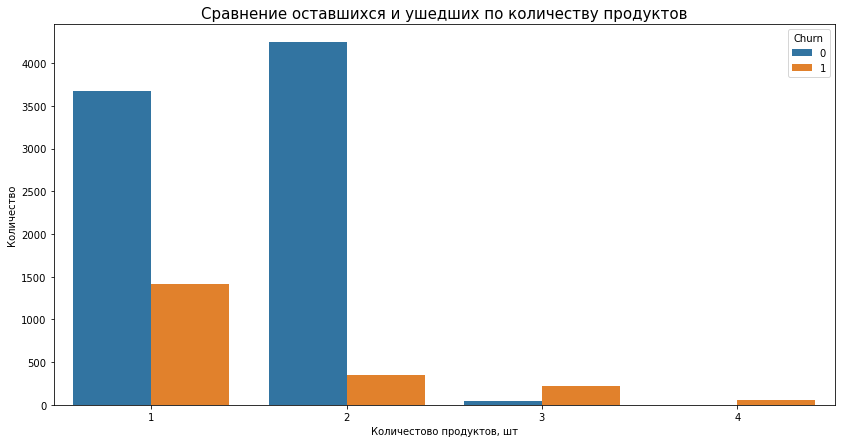

In [17]:
#построим распределение для количества используемых продуктов
products = data.groupby(['Products', 'Churn'])['userid'].count().reset_index()
#построим гистограммы для количества используемых продуктов
fig = plt.figure()
sns.barplot(x="Products", y="userid", hue="Churn", data=products)
plt.title("Сравнение оставшихся и ушедших по количеству продуктов", fontsize = 15) 
plt.xlabel('Количестово продуктов, шт')
plt.ylabel('Количество')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()

Видно, что те кто использует 3 или 4 продукта значительно меньше тех, кто использует 1 или 2 продукта, можно сказать, что количеством пользователей 3 или 4х продуктов можно пренебречь. Сравнение столбцов показывает, что те кто использует 1 продукт уходят больше, чем те кто использует 2 продукта. Нужно подсчитать точный процент оттока. 

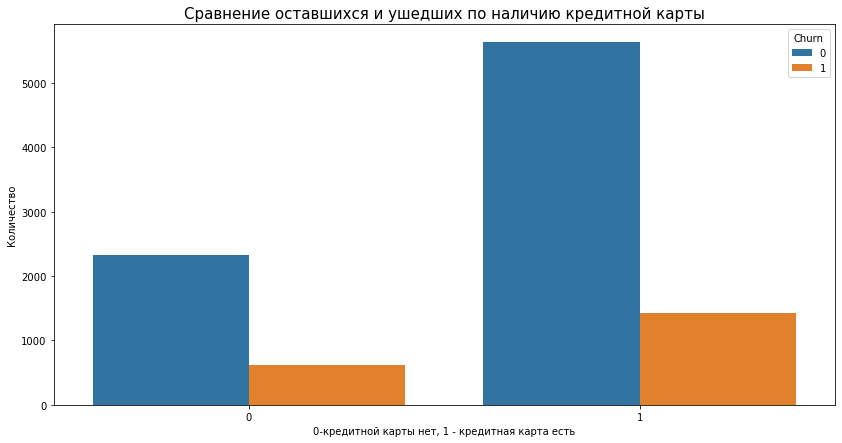

In [18]:
#построим распределение для наличия кредитной карты
сredit_сard = data.groupby(['CreditCard', 'Churn'])['userid'].count().reset_index()
#построим гистограммы для наличия кредитной карты
fig = plt.figure()
sns.barplot(x="CreditCard", y="userid", hue="Churn", data=сredit_сard)
plt.title("Сравнение оставшихся и ушедших по наличию кредитной карты", fontsize = 15) 
plt.xlabel('0-кредитной карты нет, 1 - кредитная карта есть')
plt.ylabel('Количество')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()

Клиентов имеющих кредитную карту значительно больше. Визуально оценить разницу между оставшимися и ушедшими нет возможности, поэтому нужно посчитать и сравнить проценты оттока. 

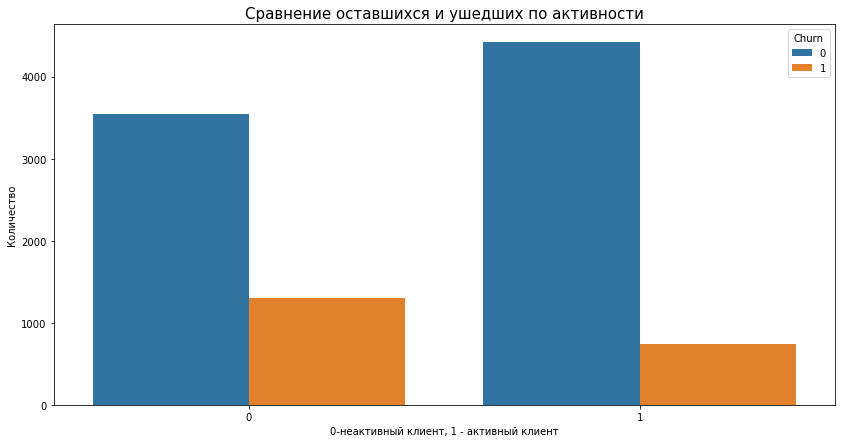

In [19]:
#построим распределение для активности клиента
loyalty = data.groupby(['Loyalty', 'Churn'])['userid'].count().reset_index()
#построим гистограммы для активности клиента
fig = plt.figure()
sns.barplot(x="Loyalty", y="userid", hue="Churn", data=loyalty)
plt.title("Сравнение оставшихся и ушедших по активности", fontsize = 15) 
plt.xlabel('0-неактивный клиент, 1 - активный клиент')
plt.ylabel('Количество')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()

Видно, что неактивные клиенты уходят чаще, поэтому нужно посчитать проценты оттока для активности клиентов.

**Общие выводы по п.2 Исследовательского анализа:** <div> 1. Нужно посчитать проценты оттока по следующим параметрам, т.к. они имеют различия в клиентах которые ушли и остались: возраст, города, пол, количество продуктов, наличие кредитной карты, активность. Добавлю сюда зарплату, т.к. планировалось выдвигать гипотезу о различии в зарплате. <div> 2. Различий по параметрам: кредитный рейтинг, количество объектов, баланс по распределению и медиане не вижу, поэтому дальнейшую работу с этими параметрами для решения задачи считаю бесперспективной. <div> 3. Клиенты у которых отсутствуют данные по балансу не склонны к оттоку и чаще используют 2 продукта. 

## 3. Посчитаем проценты оттока по параметрам в которых есть различия.

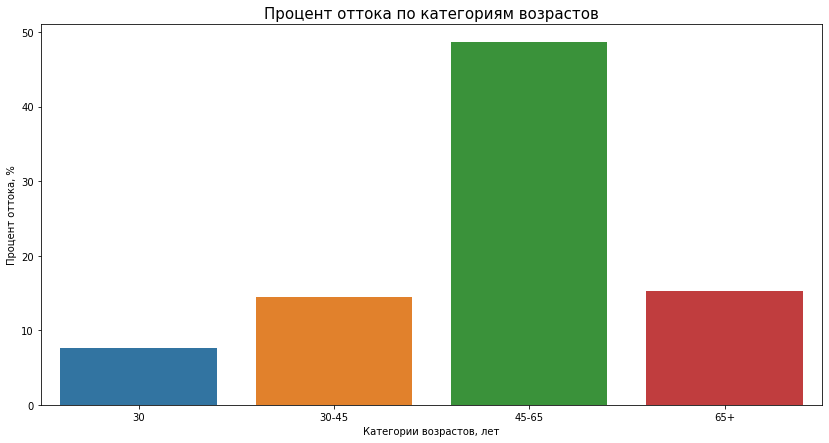

In [20]:
#разделим весь датафрэйм на 4 категории по возрастам. Условно считаем до 30 - молодежь, 30+ средний возраст, 45 смена паспорта, 65+пенсионеры
age_1 = data[data['Age']<30] 
age_2 = data[(data['Age']>=30) & (data['Age']<45)] 
age_3 = data[(data['Age']>=45) & (data['Age']<65)] 
age_4 = data[data['Age']>=65] 

#посчитаем процент оттока по категориям возрастов
age_churn_1 = round(len(age_1.query('Churn == 1'))/len(age_1)*100, 1)
age_churn_2 = round(len(age_2.query('Churn == 1'))/len(age_2)*100, 1)
age_churn_3 = round(len(age_3.query('Churn == 1'))/len(age_3)*100, 1)
age_churn_4 = round(len(age_4.query('Churn == 1'))/len(age_4)*100, 1)

#построим гистограмму для различных возрастов
fig = plt.figure()
sns.barplot(x= ['30','30-45', '45-65', '65+'], y = [age_churn_1, age_churn_2, age_churn_3, age_churn_4])
plt.title("Процент оттока по категориям возрастов", fontsize = 15) 
plt.xlabel('Категории возрастов, лет')
plt.ylabel('Процент оттока, %')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()


Клиенты из категории 45 - 65 значительно больше уходят чем остальные категории клиентов. Процент оттока доходит до 50%, что значительно выше, чем в целом по датасету (20,4%). 

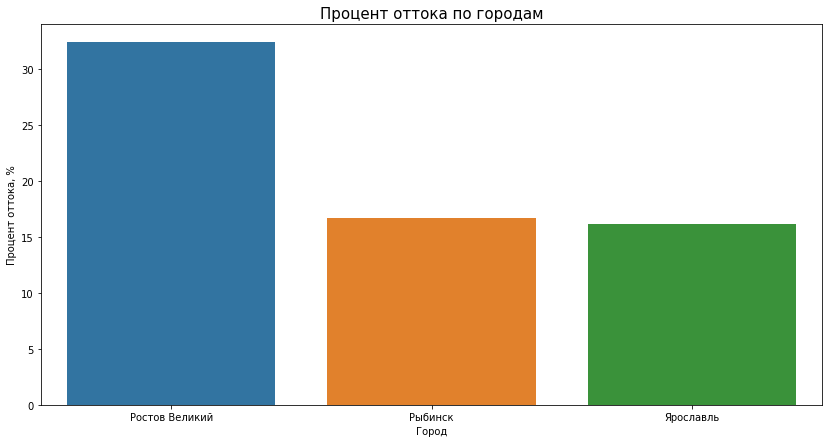

In [21]:
#сделаем срез по ушедшим в разных городах
city_churn = data.query('Churn == 1').groupby(['City', 'Churn'])['userid'].count().reset_index() 

# сделаем срез по всем в разных городах
city =  data.groupby(['City'])['userid'].count().reset_index()

#посчитаем процент оттока
city['ottok'] = round(city_churn['userid']/city['userid']*100, 1)

#построим гистограмму для городов
fig = plt.figure()
sns.barplot(x= city['City'], y = city['ottok'])
plt.title("Процент оттока по городам", fontsize = 15) 
plt.xlabel('Город')
plt.ylabel('Процент оттока, %')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()

В Ростове Великом уходят 32% клиентов. Что выше, чем в целом по датасету. 

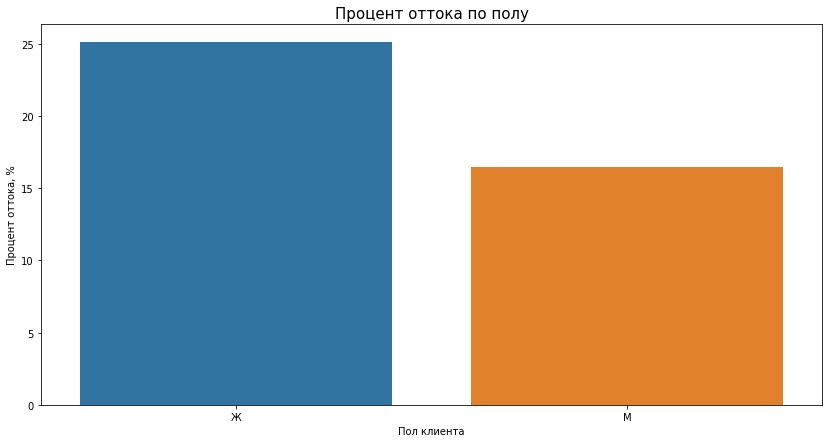

In [22]:
#сделаем срез по ушедшим клиентам разных полов
gender_churn = data.query('Churn == 1').groupby(['Gender', 'Churn'])['userid'].count().reset_index() 

# сделаем срез для подсчета клиентов по полу
gender =  data.groupby(['Gender'])['userid'].count().reset_index()

#посчитаем процент оттока
gender['ottok'] = round(gender_churn['userid']/gender['userid']*100, 1)

#построим гистограмму для полов
fig = plt.figure()
sns.barplot(x= gender['Gender'], y = gender['ottok'])
plt.title("Процент оттока по полу", fontsize = 15) 
plt.xlabel('Пол клиента')
plt.ylabel('Процент оттока, %')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()

Среди женщин ушли 25% клиентов. Среди мужчин более 15%. Получается женщины более склонны уходить. 

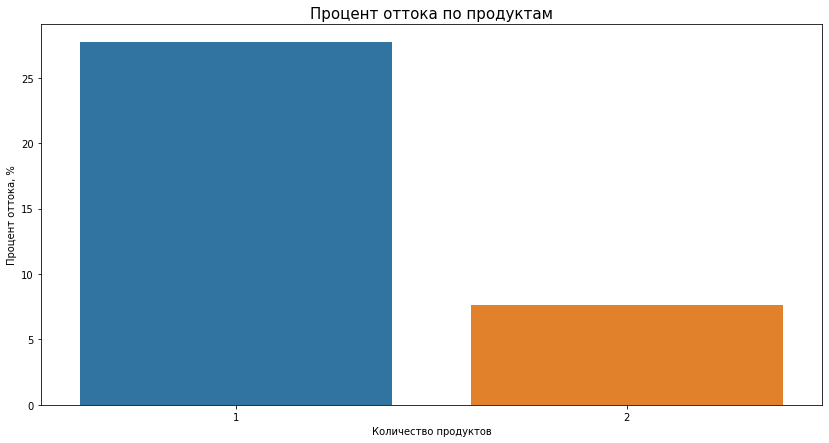

In [23]:
#сделаем срез по ушедшим в зависимости от количества продуктов
products_churn = data.query('Churn == 1').groupby(['Products', 'Churn'])['userid'].count().reset_index().query('Products in [1, 2]')
# сделаем срез по всем в зависимости от количества продуктов
products =  data.groupby(['Products'])['userid'].count().reset_index().query('Products in [1, 2]')

#посчитаем процент оттока
products['ottok'] = round(products_churn['userid']/products['userid']*100, 1)

#построим гистограмму для продуктов
fig = plt.figure()
sns.barplot(x= products['Products'], y = products['ottok'])
plt.title("Процент оттока по продуктам", fontsize = 15) 
plt.xlabel('Количество продуктов')
plt.ylabel('Процент оттока, %')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()


Для количества продуктов равному 3 и 4 строить не стал, т.к. мало данных по ним. Те кто пользуется одним продуктом (более 25%) уходят значительно чаще, чем те кто пользуется двумя продуктами. 

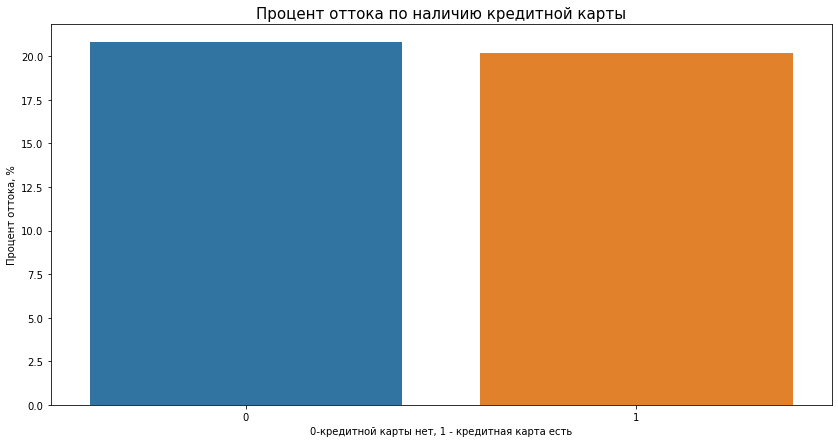

In [24]:
#сделаем срез по ушедшим от наличия кредитной карты
card_churn = data.query('Churn == 1').groupby(['CreditCard', 'Churn'])['userid'].count().reset_index() 

# сделаем срез для подсчета клиентов по наличию кредитной карты
card =  data.groupby(['CreditCard'])['userid'].count().reset_index()

#посчитаем процент оттока
card['ottok'] = round(card_churn['userid']/card['userid']*100, 1)

#построим гистограмму по наличию кредитной карты
fig = plt.figure()
sns.barplot(x= card['CreditCard'], y = card['ottok'])
plt.title("Процент оттока по наличию кредитной карты", fontsize = 15) 
plt.xlabel('0-кредитной карты нет, 1 - кредитная карта есть')
plt.ylabel('Процент оттока, %')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()


Различия в %оттока в зависимости от наличия кредитной карты нет. 

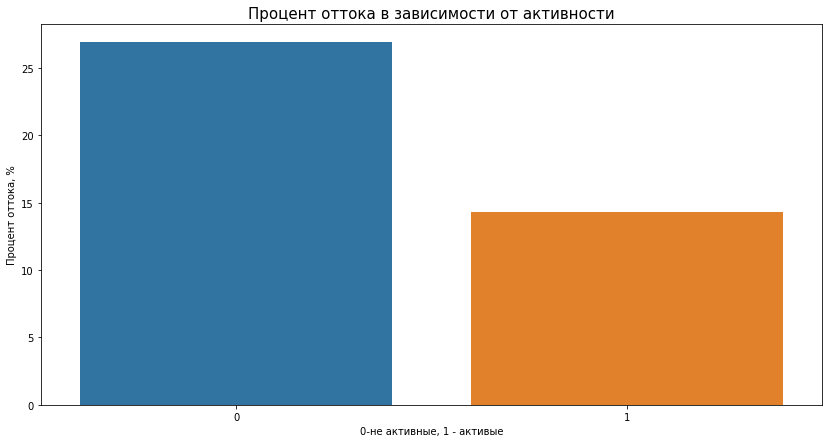

In [25]:
#сделаем срез по ушедшим в зависимости от активности
loyalty_churn = data.query('Churn == 1').groupby(['Loyalty', 'Churn'])['userid'].count().reset_index() 

# сделаем срез для подсчета клиентов в зависимости от активности
loyalty =  data.groupby(['Loyalty'])['userid'].count().reset_index()

#посчитаем процент оттока
loyalty['ottok'] = round(loyalty_churn['userid']/loyalty['userid']*100, 1)

#построим гистограмму в зависимости от активности
fig = plt.figure()
sns.barplot(x= loyalty['Loyalty'], y = loyalty['ottok'])
plt.title("Процент оттока в зависимости от активности", fontsize = 15) 
plt.xlabel('0-не активные, 1 - активые')
plt.ylabel('Процент оттока, %')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()

Не активные (более 25%) уходят значительно чаще, чем те кто проявляет активность. 

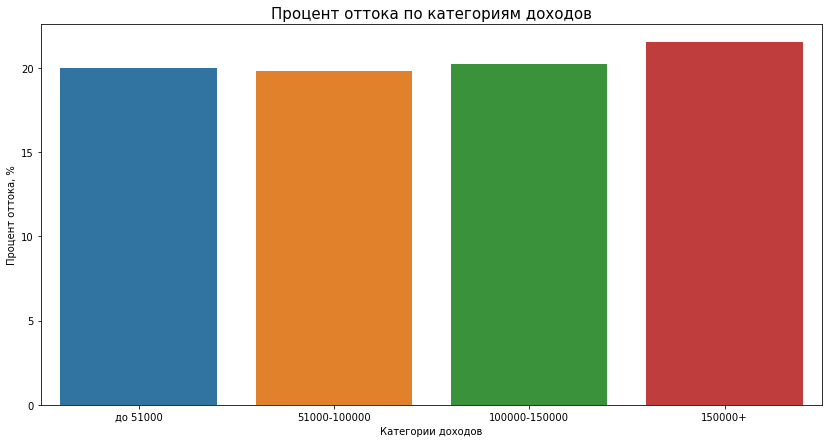

In [26]:
#разделим весь датафрэйм на 4 категории по доходу в зависимости от процентиля. 
income_1 = data[data['estimated_salary']<51000] #до 25 процентиля
income_2 = data[(data['estimated_salary']>=51000) & (data['estimated_salary']<100000)] #от 25 до 50 процентиля
income_3 = data[(data['estimated_salary']>=100000) & (data['estimated_salary']<150000)] #от 50 до 75 процентиля
income_4 = data[data['estimated_salary']>=150000] #более 75 процентиля

#посчитаем процент оттока по категориям доходов
income_churn_1 = round(len(income_1.query('Churn == 1'))/len(income_1)*100, 1)
income_churn_2 = round(len(income_2.query('Churn == 1'))/len(income_2)*100, 1)
income_churn_3 = round(len(income_3.query('Churn == 1'))/len(income_3)*100, 1)
income_churn_4 = round(len(income_4.query('Churn == 1'))/len(income_4)*100, 1)

#построим гистограмму для различных возрастов
fig = plt.figure()
sns.barplot(x= ['до 51000','51000-100000', '100000-150000', '150000+'], y = [income_churn_1, income_churn_2, income_churn_3, income_churn_4])
plt.title("Процент оттока по категориям доходов", fontsize = 15) 
plt.xlabel('Категории доходов')
plt.ylabel('Процент оттока, %')
fig.set_figwidth(14)
fig.set_figheight(7)
plt.show()

Из гистограммы видно, что процент оттока не зависит от уровня дохода. 

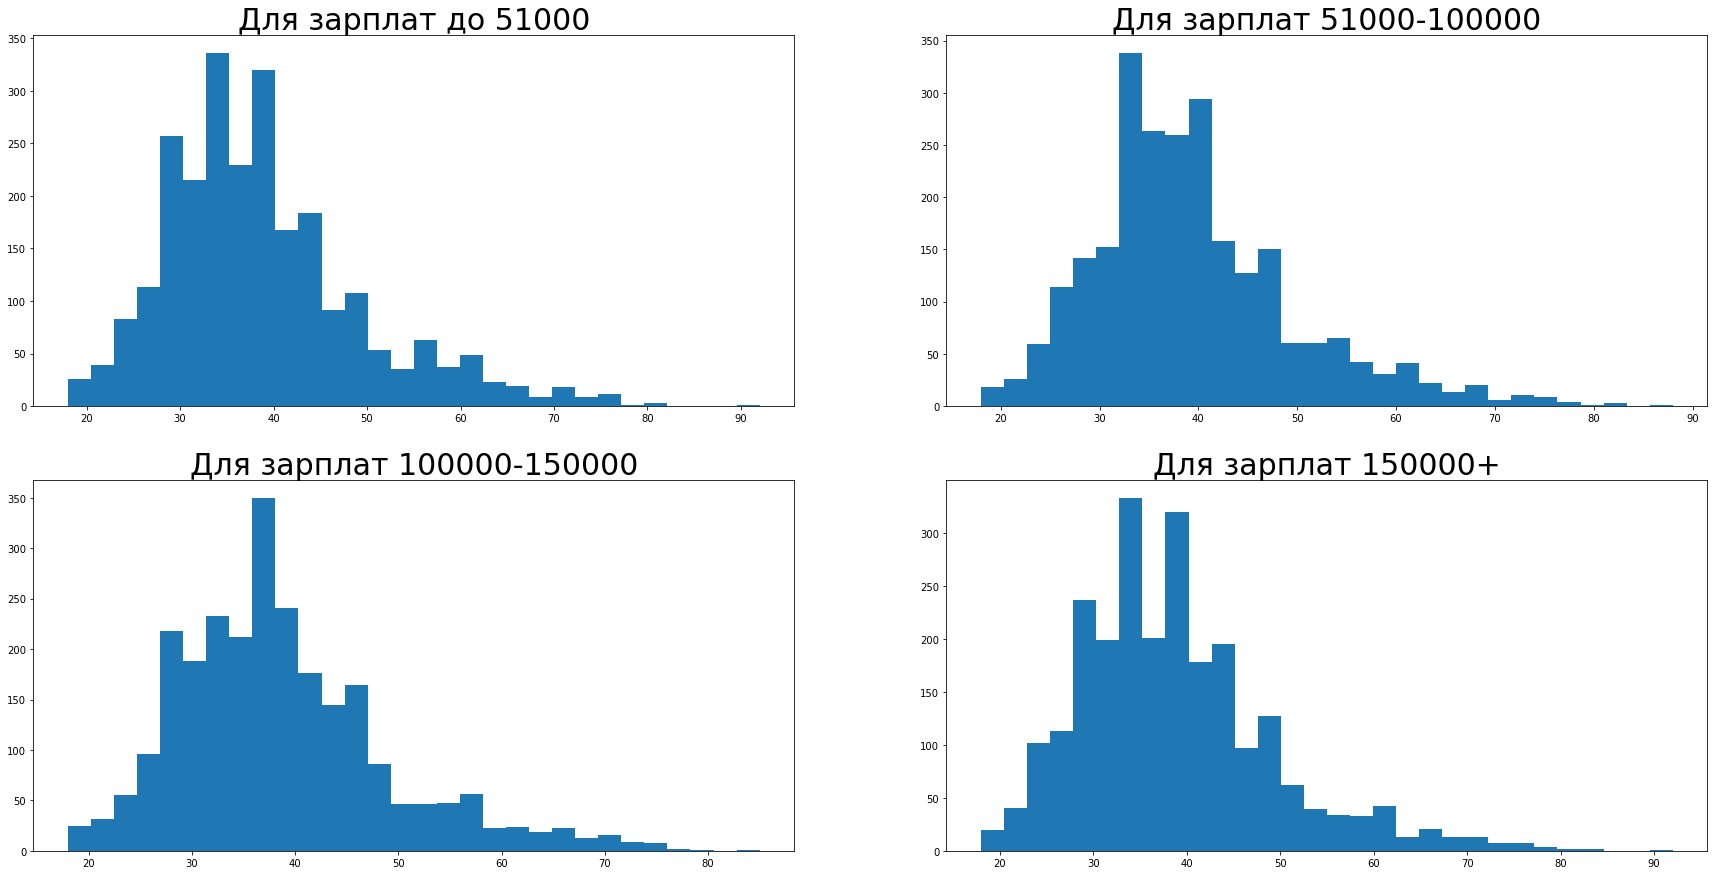

In [27]:
#Посмотрим распределение возраста по категориям зарплат
plt.figure(figsize=(30, 15))

plt.subplot(2, 2, 1)
plt.hist(income_1['Age'], bins = 30)
plt.title("Для зарплат до 51000", fontsize = 30) 
plt.subplot(2, 2, 2)
plt.hist(income_2['Age'], bins = 30)
plt.title("Для зарплат 51000-100000", fontsize = 30)
plt.subplot(2, 2, 3)
plt.hist(income_3['Age'], bins = 30)
plt.title("Для зарплат 100000-150000", fontsize = 30)
plt.subplot(2, 2, 4)
plt.hist(income_4['Age'], bins = 30)
plt.title("Для зарплат 150000+", fontsize = 30);

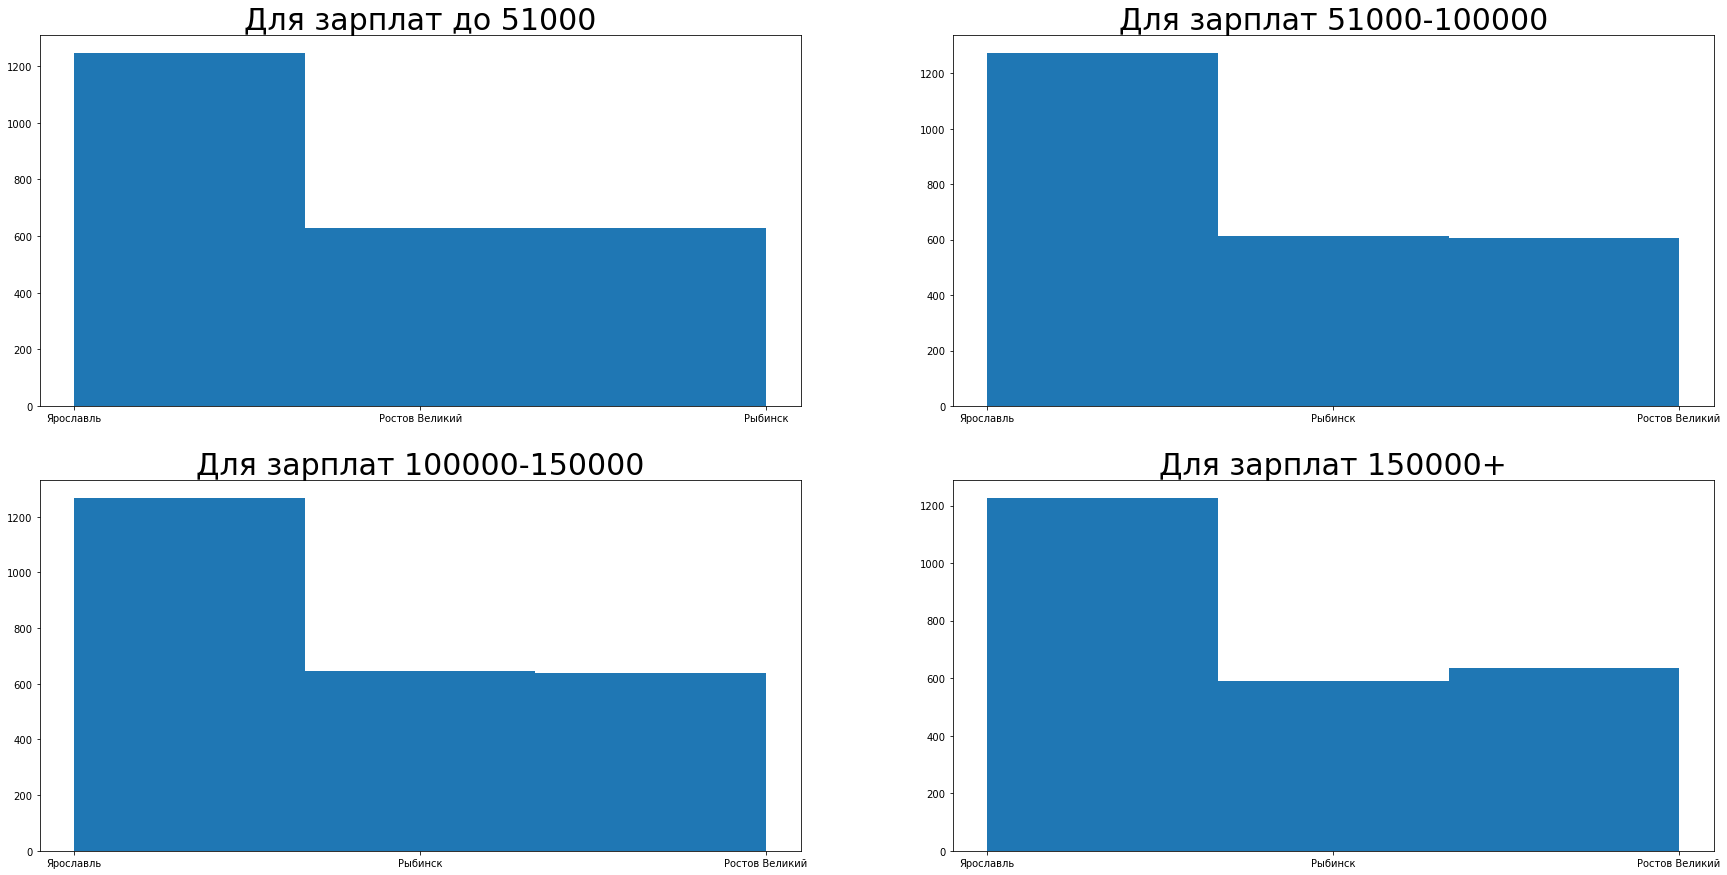

In [28]:
#Посмотрим распределение городов по категориям зарплат
plt.figure(figsize=(30, 15))

plt.subplot(2, 2, 1)
plt.hist(income_1['City'], bins = 3)
plt.title("Для зарплат до 51000", fontsize = 30) 
plt.subplot(2, 2, 2)
plt.hist(income_2['City'], bins = 3)
plt.title("Для зарплат 51000-100000", fontsize = 30)
plt.subplot(2, 2, 3)
plt.hist(income_3['City'], bins = 3)
plt.title("Для зарплат 100000-150000", fontsize = 30)
plt.subplot(2, 2, 4)
plt.hist(income_4['City'], bins = 3)
plt.title("Для зарплат 150000+", fontsize = 30);

Различий по возрасту и городу от категорий дохода не вижу.

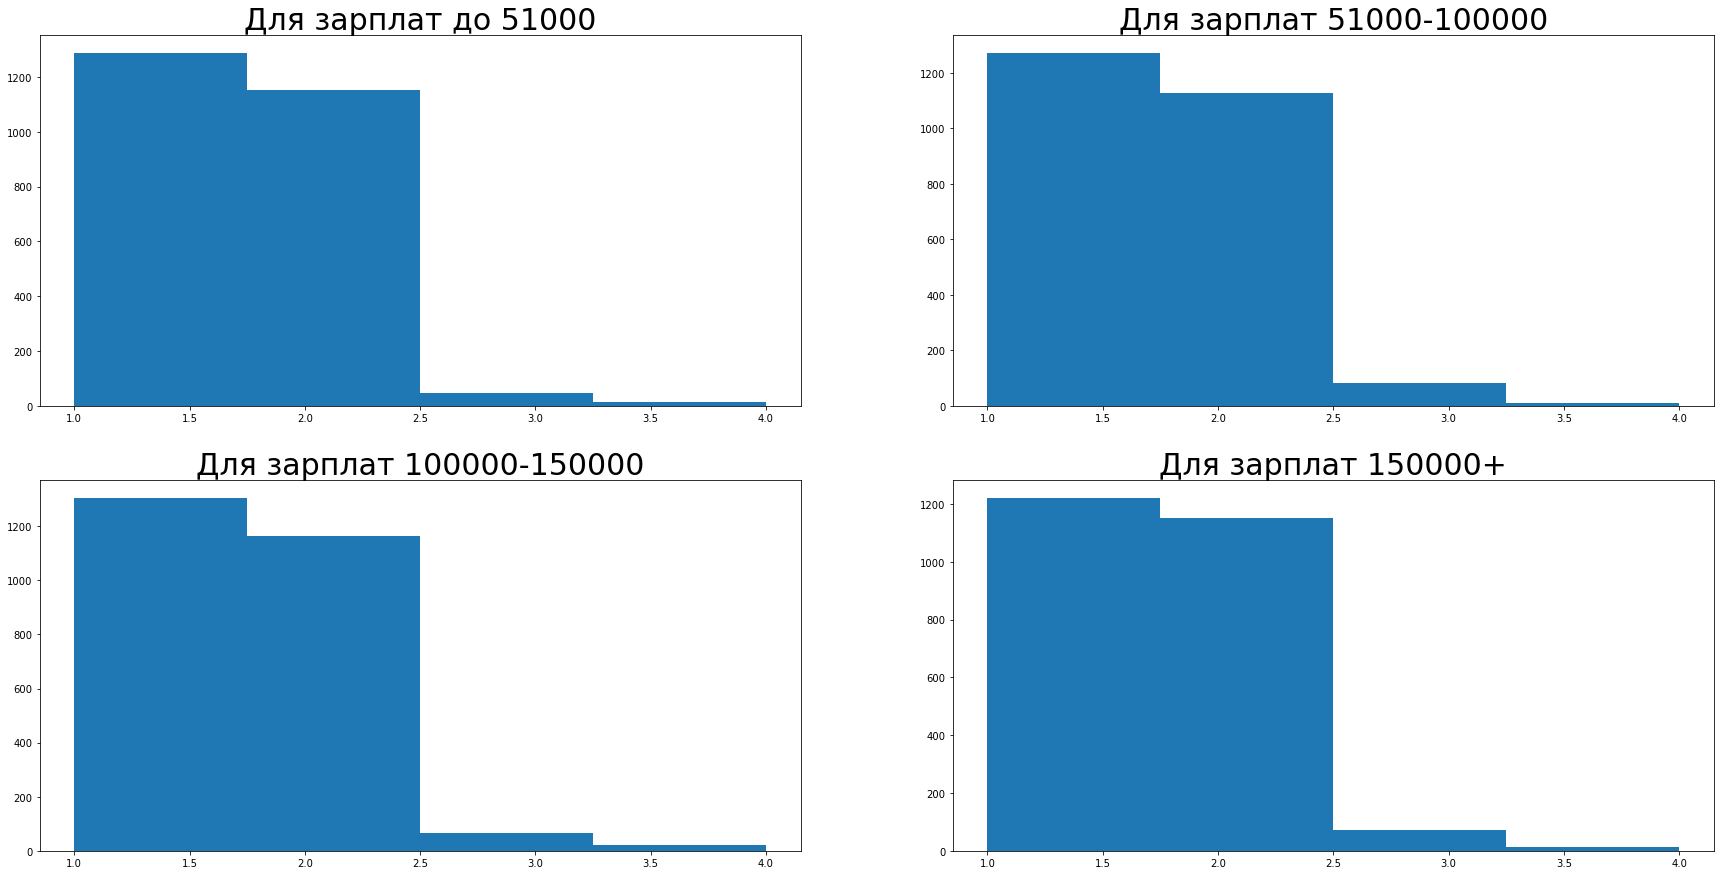

In [29]:
#Посмотрим распределение количества продуктов по категориям зарплат
plt.figure(figsize=(30, 15))

plt.subplot(2, 2, 1)
plt.hist(income_1['Products'], bins = 4)
plt.title("Для зарплат до 51000", fontsize = 30) 
plt.subplot(2, 2, 2)
plt.hist(income_2['Products'], bins = 4)
plt.title("Для зарплат 51000-100000", fontsize = 30)
plt.subplot(2, 2, 3)
plt.hist(income_3['Products'], bins = 4)
plt.title("Для зарплат 100000-150000", fontsize = 30)
plt.subplot(2, 2, 4)
plt.hist(income_4['Products'], bins = 4)
plt.title("Для зарплат 150000+", fontsize = 30);

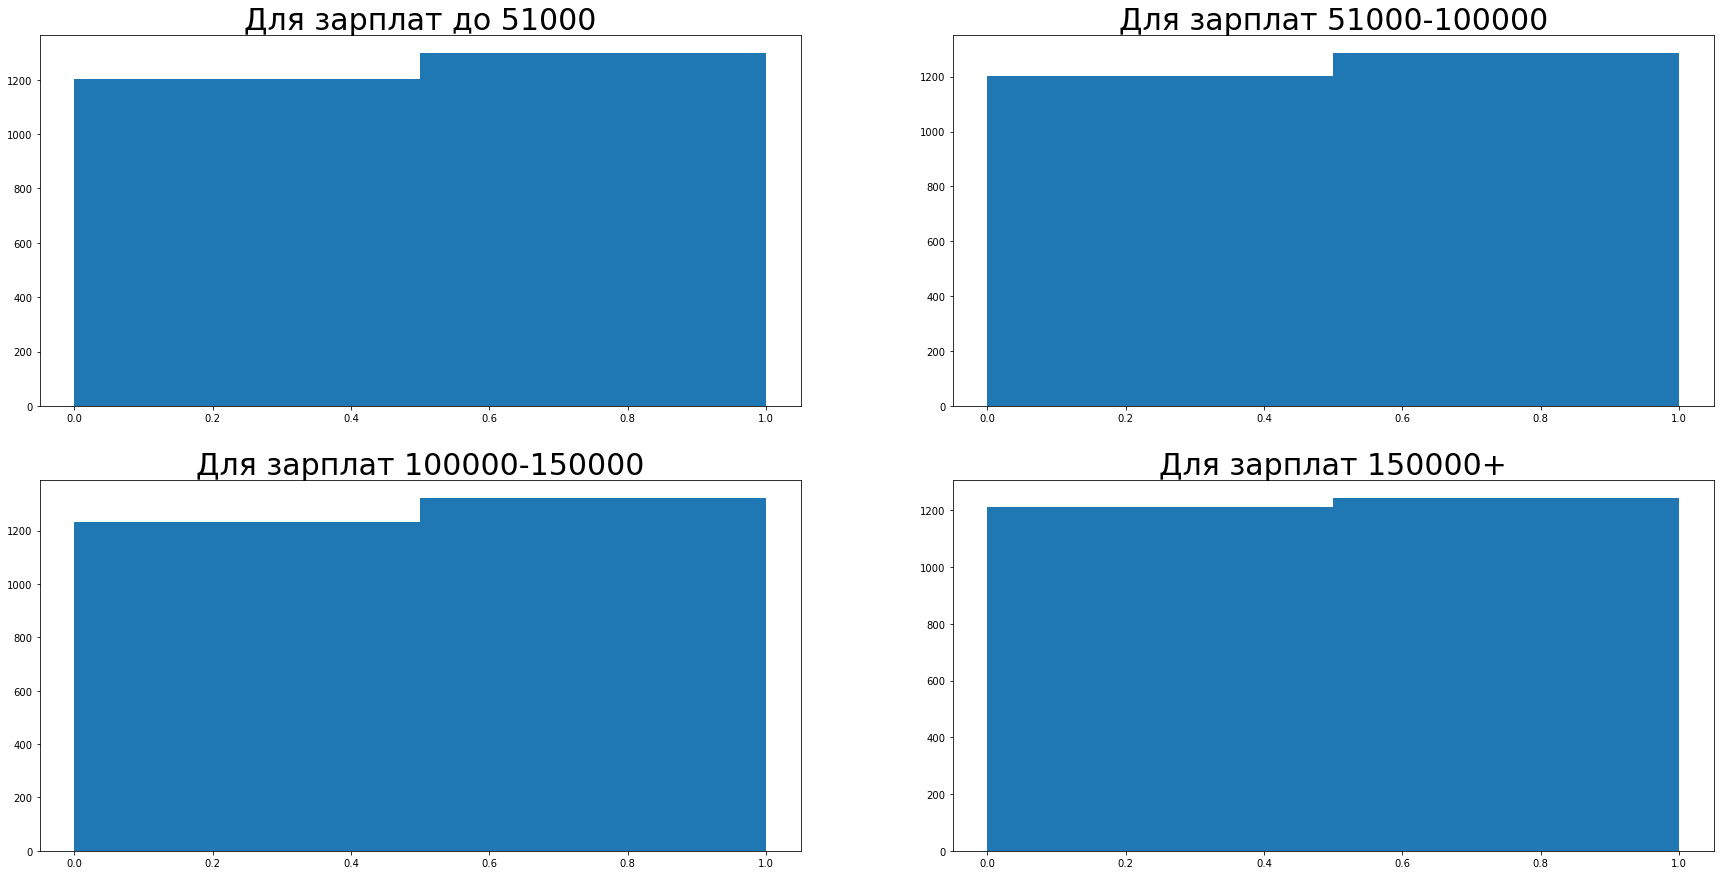

In [30]:
#Посмотрим распределение активности по категориям зарплат
plt.figure(figsize=(30, 15))

plt.subplot(2, 2, 1)
plt.hist(income_1['Loyalty'], bins = 2)
plt.title("Для зарплат до 51000", fontsize = 30) 
plt.subplot(2, 2, 2)
plt.hist(income_2['Loyalty'], bins = 2)
plt.title("Для зарплат 51000-100000", fontsize = 30)
plt.subplot(2, 2, 3)
plt.hist(income_3['Loyalty'], bins = 2)
plt.title("Для зарплат 100000-150000", fontsize = 30)
plt.subplot(2, 2, 4)
plt.hist(income_4['Loyalty'], bins = 2)
plt.title("Для зарплат 150000+", fontsize = 30);

Различий по количеству продуктов и активности от категорий дохода не вижу.

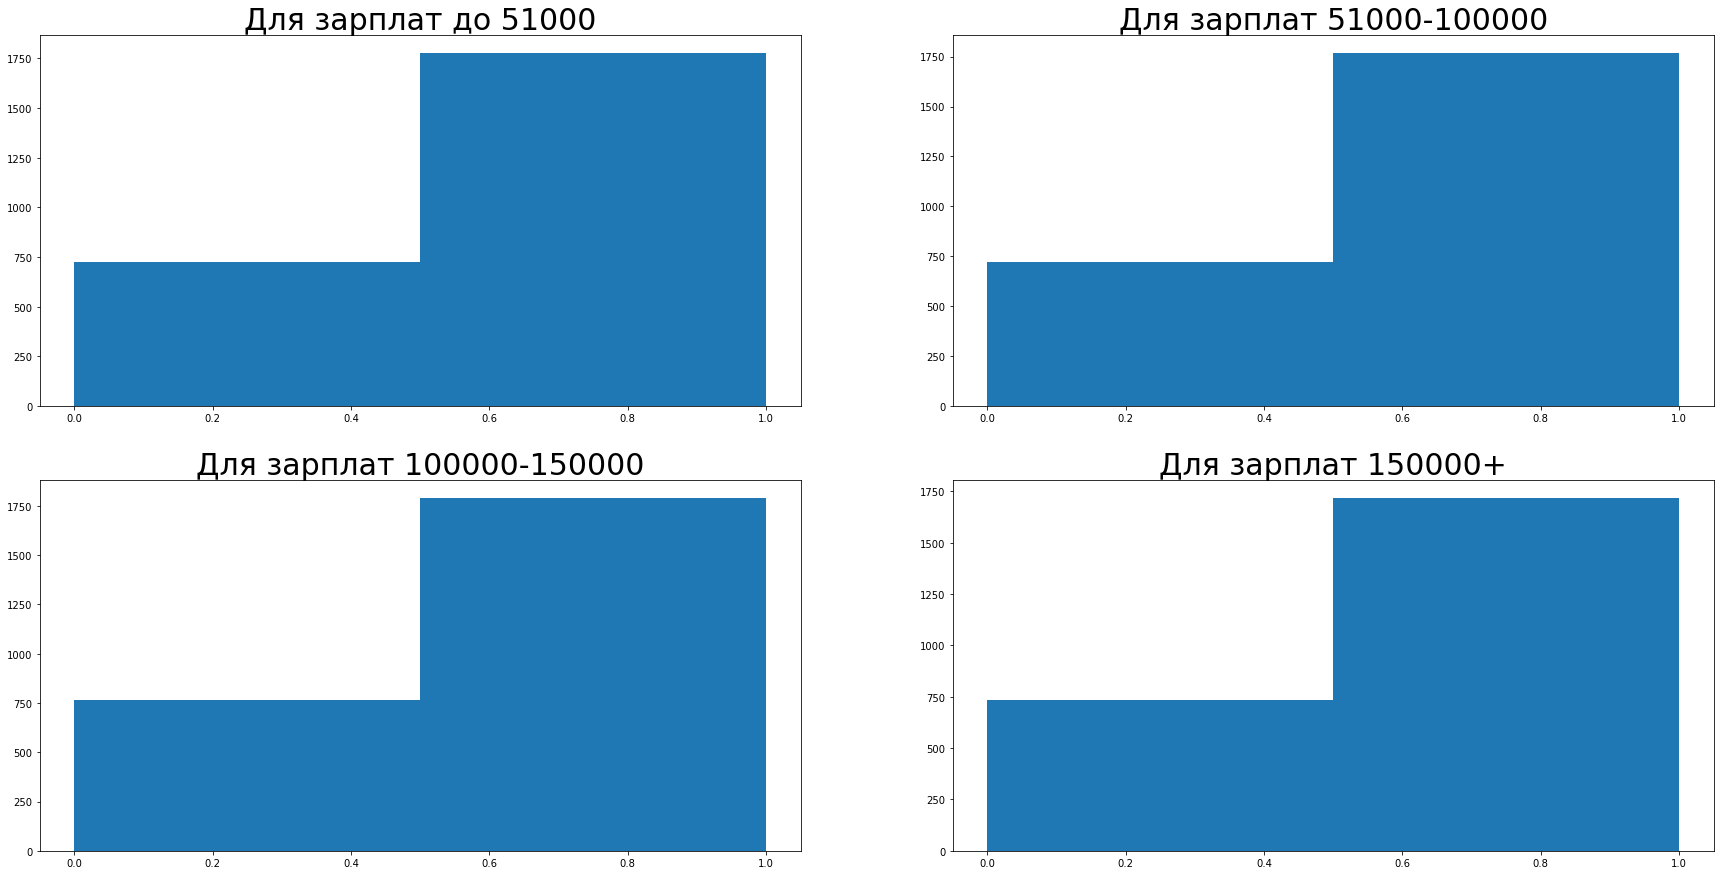

In [31]:
#Посмотрим распределение наличия кредитной карты по категориям зарплат
plt.figure(figsize=(30, 15))

plt.subplot(2, 2, 1)
plt.hist(income_1['CreditCard'], bins = 2)
plt.title("Для зарплат до 51000", fontsize = 30) 
plt.subplot(2, 2, 2)
plt.hist(income_2['CreditCard'], bins = 2)
plt.title("Для зарплат 51000-100000", fontsize = 30)
plt.subplot(2, 2, 3)
plt.hist(income_3['CreditCard'], bins = 2)
plt.title("Для зарплат 100000-150000", fontsize = 30)
plt.subplot(2, 2, 4)
plt.hist(income_4['CreditCard'], bins = 2)
plt.title("Для зарплат 150000+", fontsize = 30);

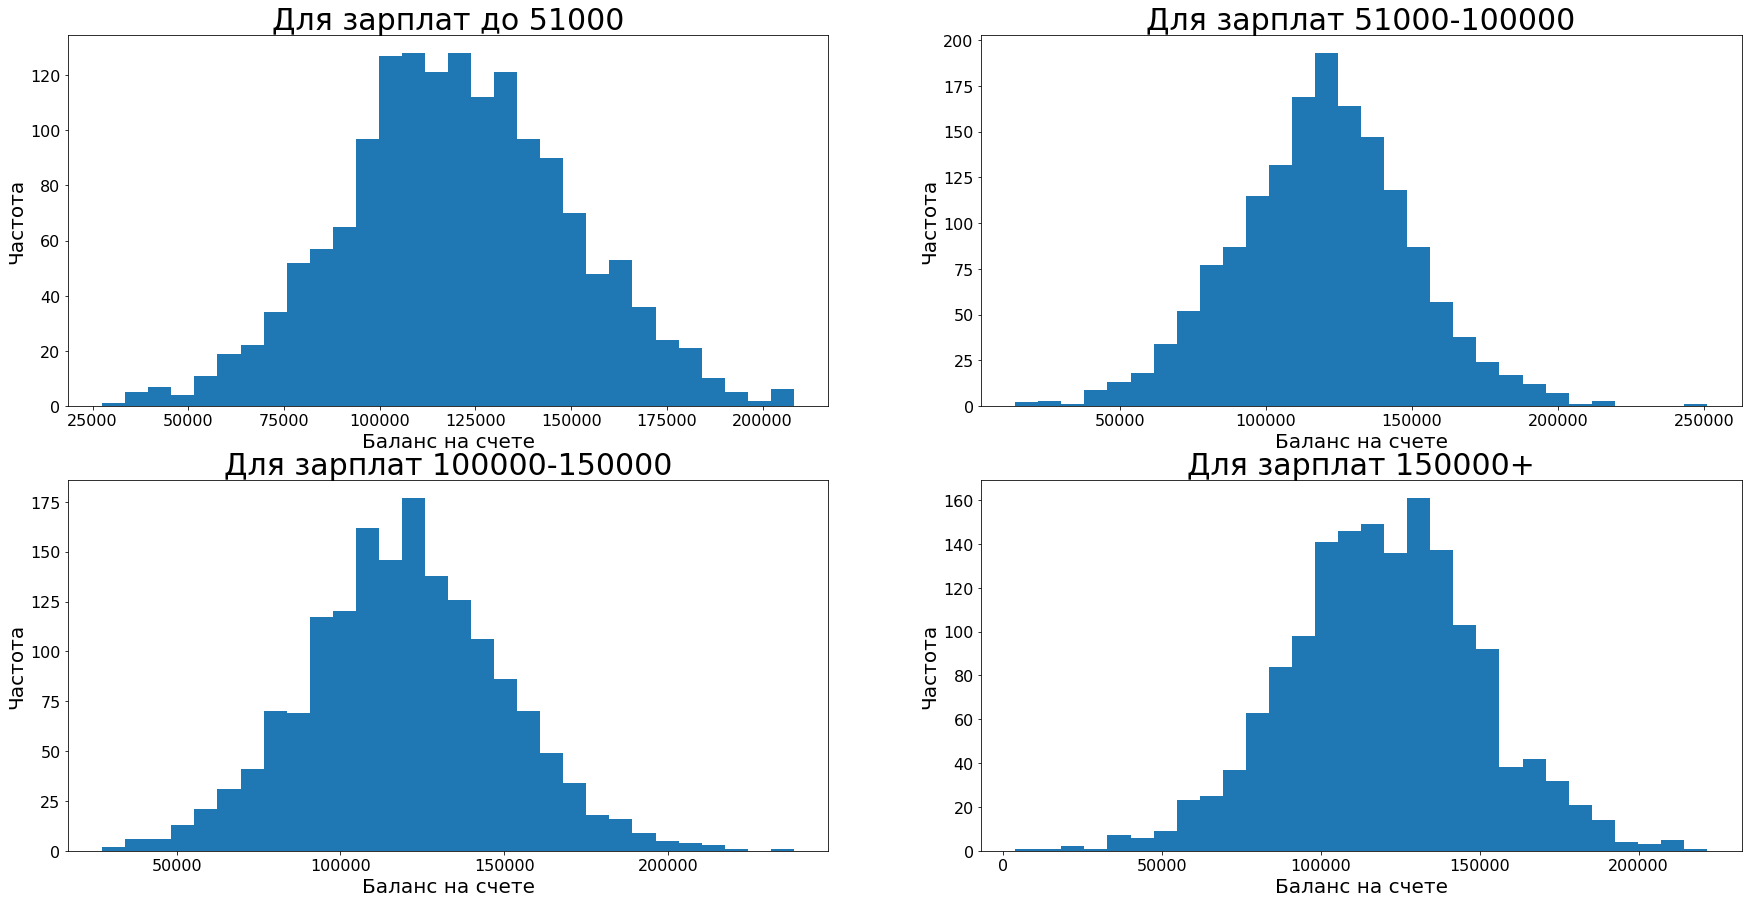

In [32]:
#Посмотрим распределение баланса по категориям зарплат
plt.figure(figsize=(30, 15))
plt.rcParams['font.size'] = '16'

plt.subplot(2, 2, 1)
plt.hist(income_1['Balance'], bins = 30)
plt.title("Для зарплат до 51000", fontsize = 30) 
plt.xlabel('Баланс на счете', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(2, 2, 2)
plt.hist(income_2['Balance'], bins = 30)
plt.title("Для зарплат 51000-100000", fontsize = 30)
plt.xlabel('Баланс на счете', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(2, 2, 3)
plt.hist(income_3['Balance'], bins = 30)
plt.title("Для зарплат 100000-150000", fontsize = 30)
plt.xlabel('Баланс на счете', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(2, 2, 4)
plt.hist(income_4['Balance'], bins = 30)
plt.title("Для зарплат 150000+", fontsize = 30)
plt.xlabel('Баланс на счете', size=20)
plt.ylabel('Частота', size=20);

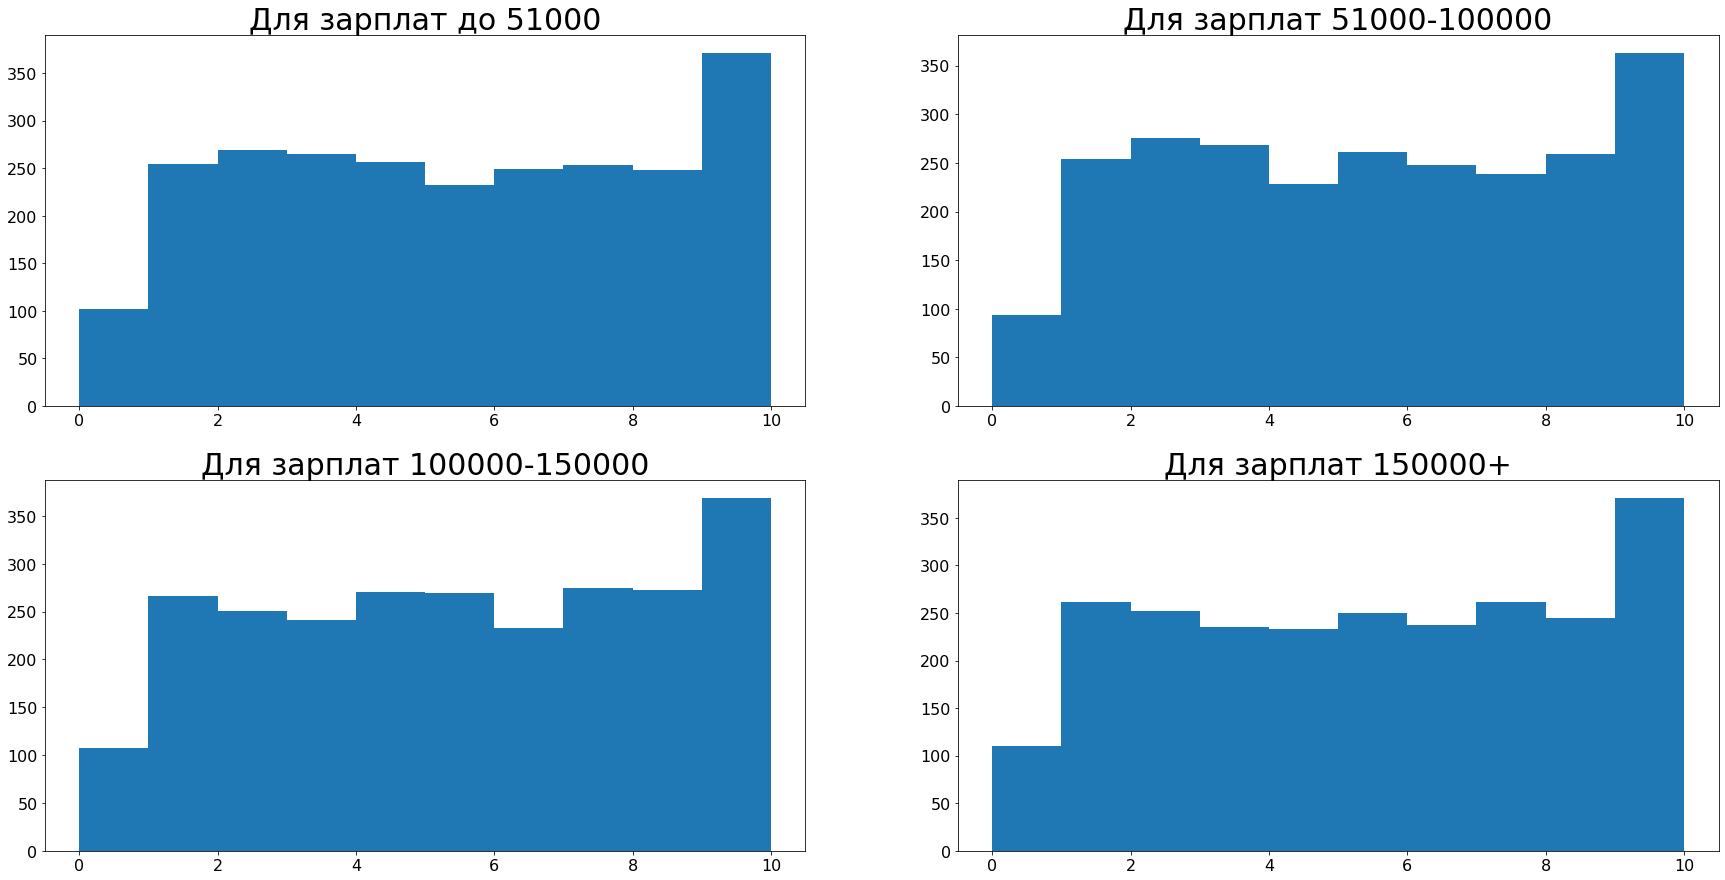

In [33]:
#Посмотрим распределение объектов в собственности по категориям зарплат
plt.figure(figsize=(30, 15))

plt.subplot(2, 2, 1)
plt.hist(income_1['Objects'])
plt.title("Для зарплат до 51000", fontsize = 30) 
plt.subplot(2, 2, 2)
plt.hist(income_2['Objects'])
plt.title("Для зарплат 51000-100000", fontsize = 30)
plt.subplot(2, 2, 3)
plt.hist(income_3['Objects'])
plt.title("Для зарплат 100000-150000", fontsize = 30)
plt.subplot(2, 2, 4)
plt.hist(income_4['Objects'])
plt.title("Для зарплат 150000+", fontsize = 30);

Различий по количеству объектов в собственности и баланса от категорий дохода не вижу.

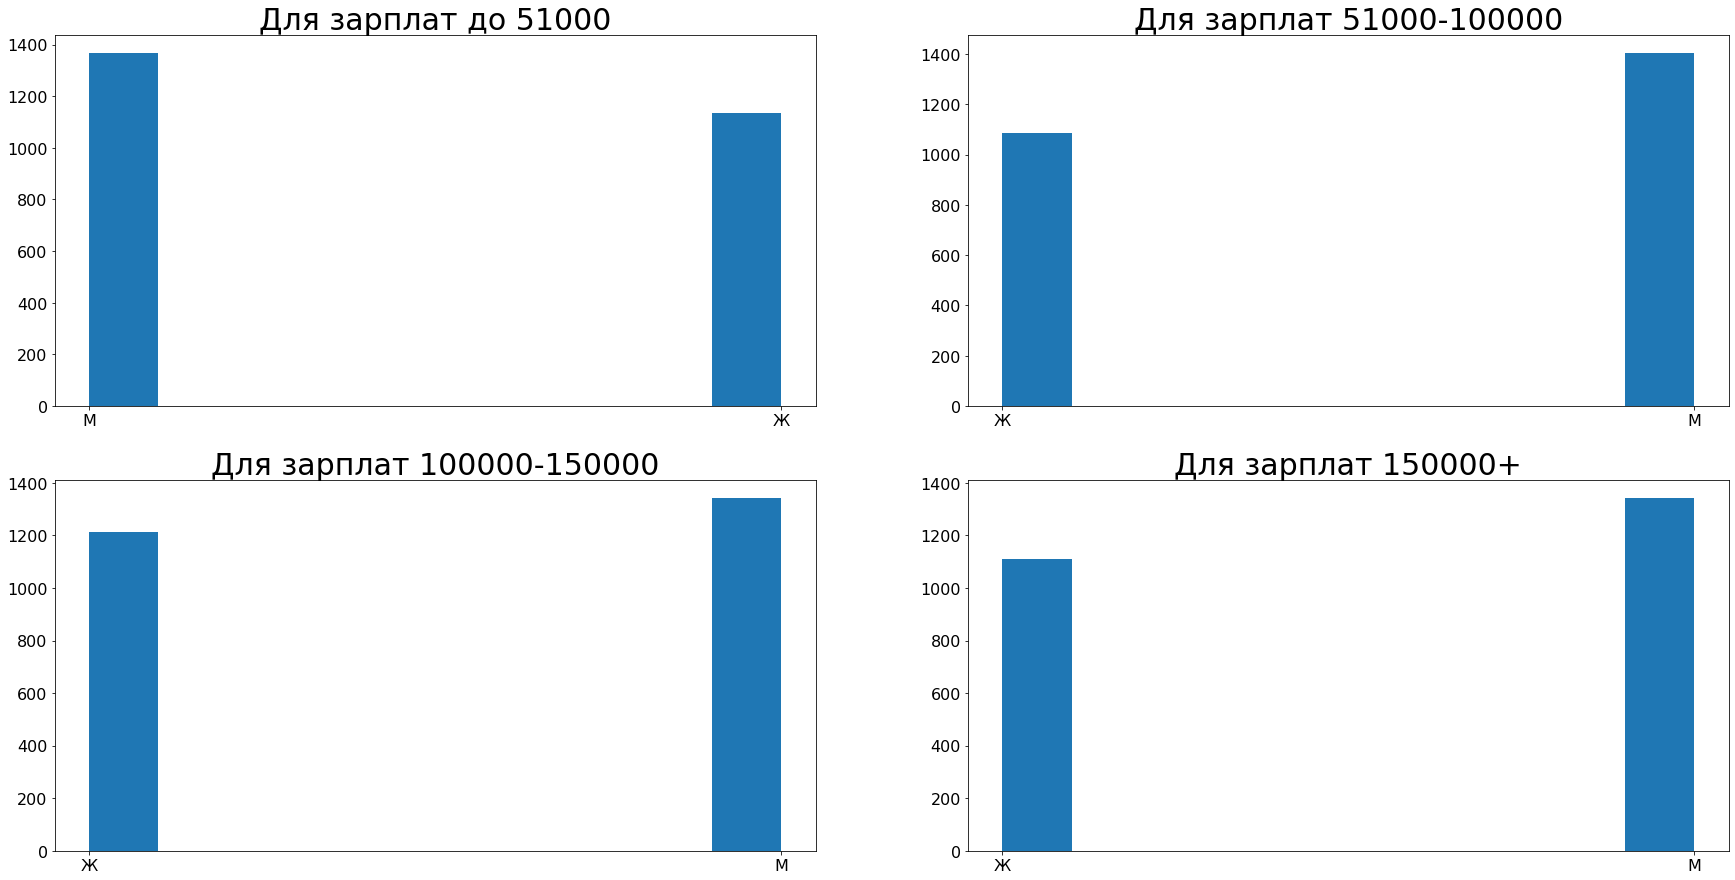

In [34]:
#Посмотрим распределение полов по категориям зарплат
plt.figure(figsize=(30, 15))

plt.subplot(2, 2, 1)
plt.hist(income_1['Gender'])
plt.title("Для зарплат до 51000", fontsize = 30) 
plt.subplot(2, 2, 2)
plt.hist(income_2['Gender'])
plt.title("Для зарплат 51000-100000", fontsize = 30)
plt.subplot(2, 2, 3)
plt.hist(income_3['Gender'])
plt.title("Для зарплат 100000-150000", fontsize = 30)
plt.subplot(2, 2, 4)
plt.hist(income_4['Gender'])
plt.title("Для зарплат 150000+", fontsize = 30);

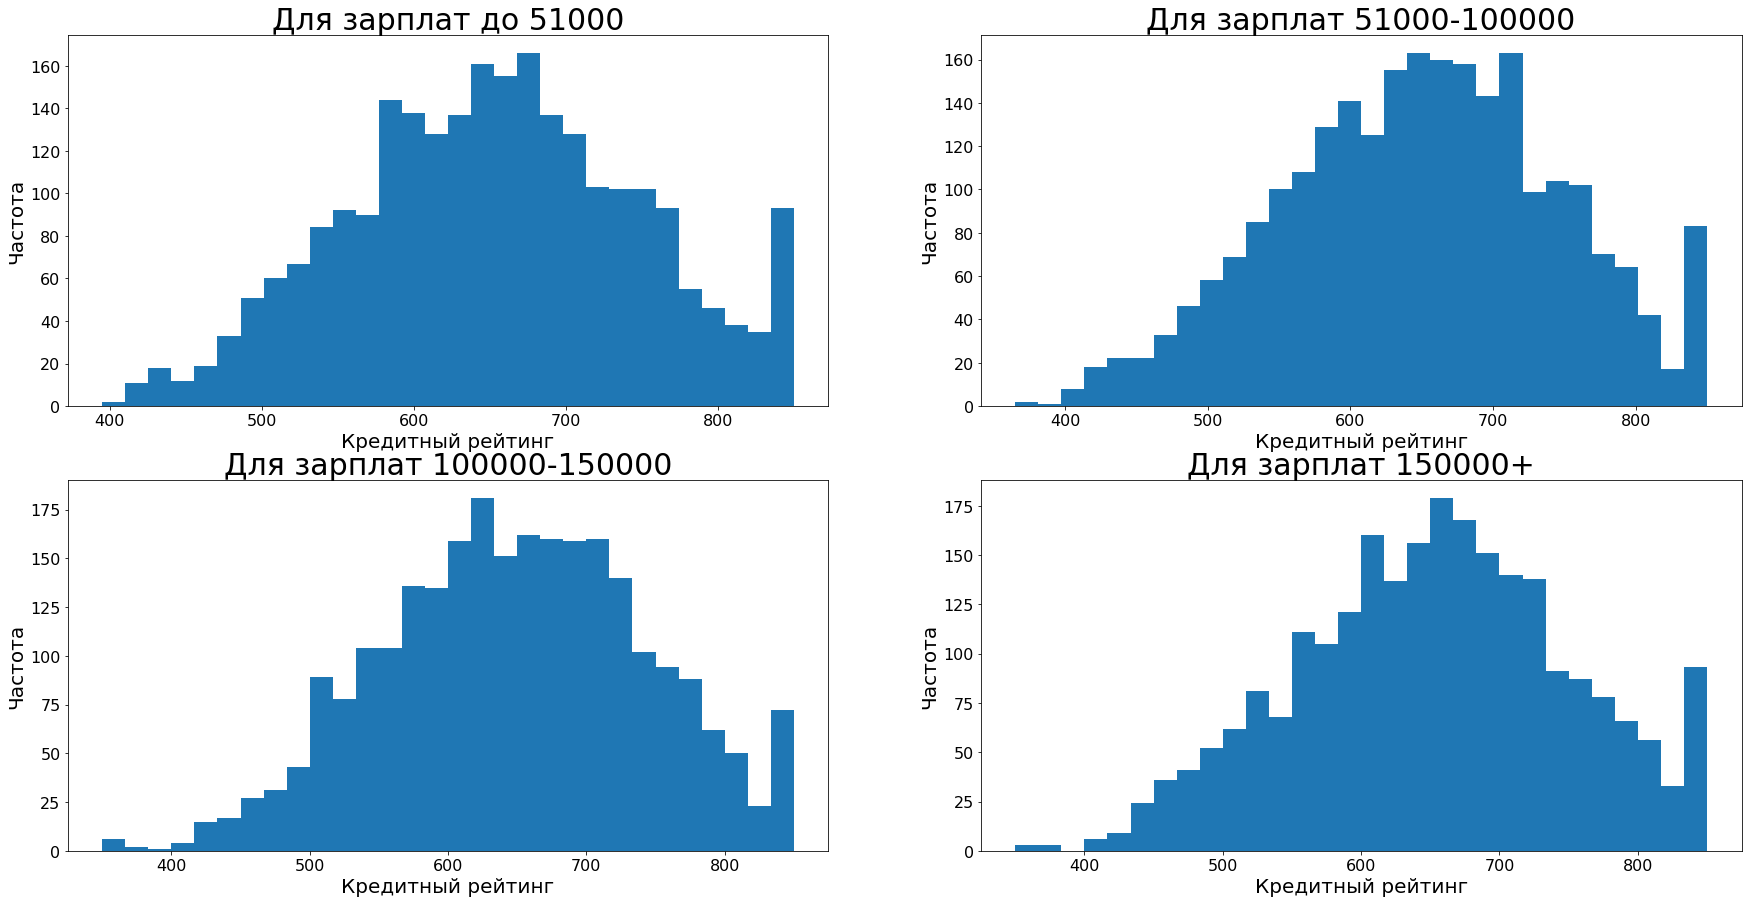

In [35]:
#Посмотрим распределение кредитного рейтинга по категориям зарплат
plt.figure(figsize=(30, 15))
plt.rcParams['font.size'] = '16'

plt.subplot(2, 2, 1)
plt.hist(income_1['score'], bins = 30)
plt.title("Для зарплат до 51000", fontsize = 30) 
plt.xlabel('Кредитный рейтинг', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(2, 2, 2)
plt.hist(income_2['score'], bins = 30)
plt.title("Для зарплат 51000-100000", fontsize = 30)
plt.xlabel('Кредитный рейтинг', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(2, 2, 3)
plt.hist(income_3['score'], bins = 30)
plt.title("Для зарплат 100000-150000", fontsize = 30)
plt.xlabel('Кредитный рейтинг', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(2, 2, 4)
plt.hist(income_4['score'], bins = 30)
plt.title("Для зарплат 150000+", fontsize = 30)
plt.xlabel('Кредитный рейтинг', size=20)
plt.ylabel('Частота', size=20);

Различий по полу и кредитному рейтингу от категорий дохода не вижу.

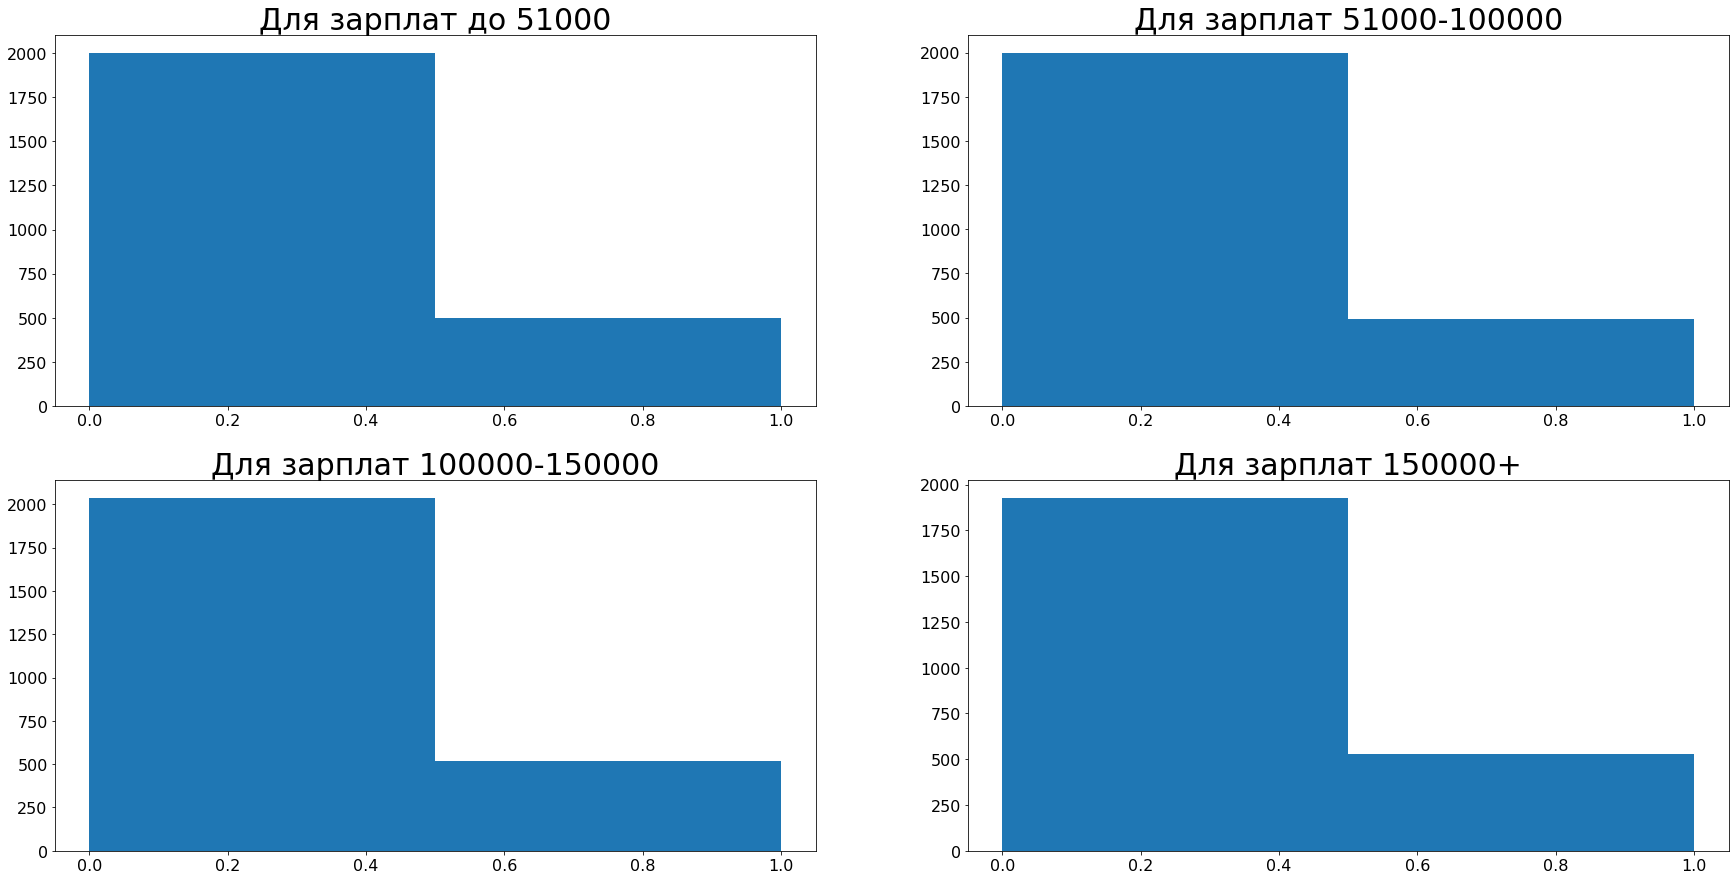

In [36]:
#Посмотрим распределение оттока по категориям зарплат
plt.figure(figsize=(30, 15))

plt.subplot(2, 2, 1)
plt.hist(income_1['Churn'], bins = 2)
plt.title("Для зарплат до 51000", fontsize = 30) 
plt.subplot(2, 2, 2)
plt.hist(income_2['Churn'], bins = 2)
plt.title("Для зарплат 51000-100000", fontsize = 30)
plt.subplot(2, 2, 3)
plt.hist(income_3['Churn'], bins = 2)
plt.title("Для зарплат 100000-150000", fontsize = 30)
plt.subplot(2, 2, 4)
plt.hist(income_4['Churn'], bins = 2)
plt.title("Для зарплат 150000+", fontsize = 30);

Различий в оттоке от категорий дохода не вижу.

## 4. Исследование "хорошего" и "плохого" клиентов.

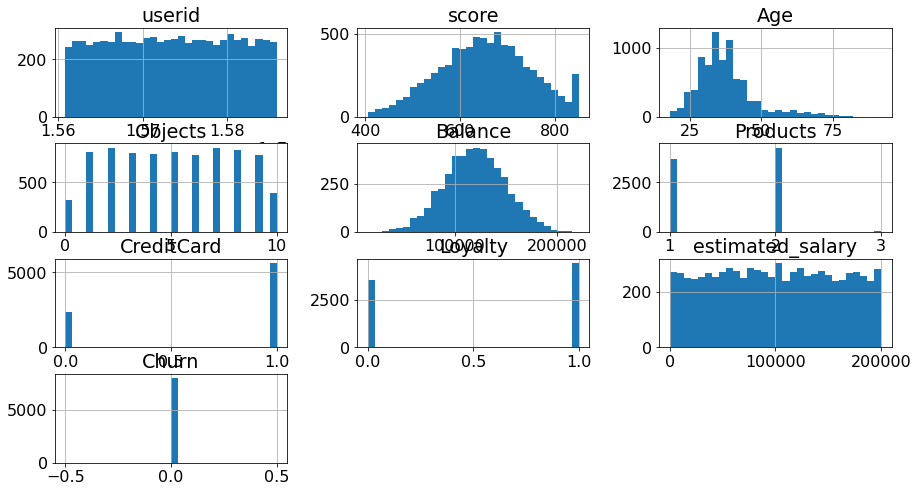

In [37]:
#Сделаем подвыборки для ушедших и оставшихся
stay = data.query("Churn == 0")
churn = data.query("Churn == 1")
#Посмотрим распределения для оставшихся
stay.hist(bins = 30, figsize = (15,8));

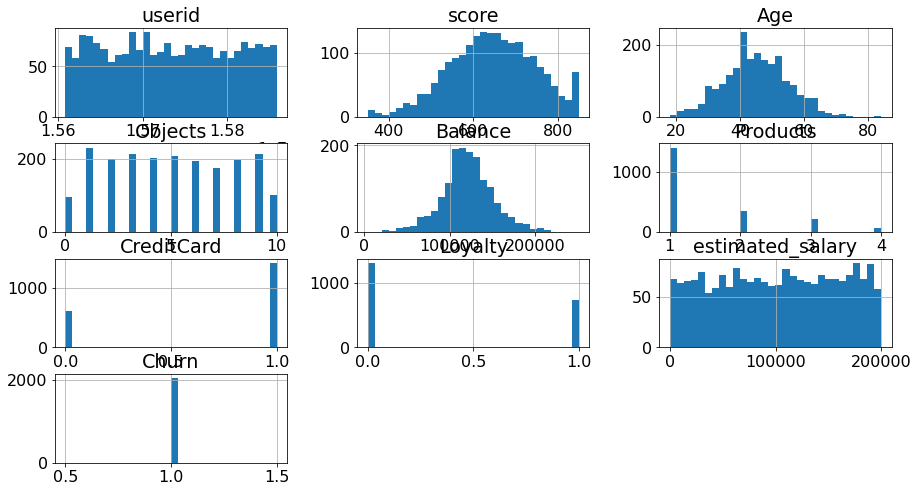

In [38]:
#Сравним  распределения с ушедшими
churn.hist(bins = 30, figsize = (15,8));

Заметны различия в возрасте, активности и количестве продуктов. Построим читаемые графики для этих параметров. 

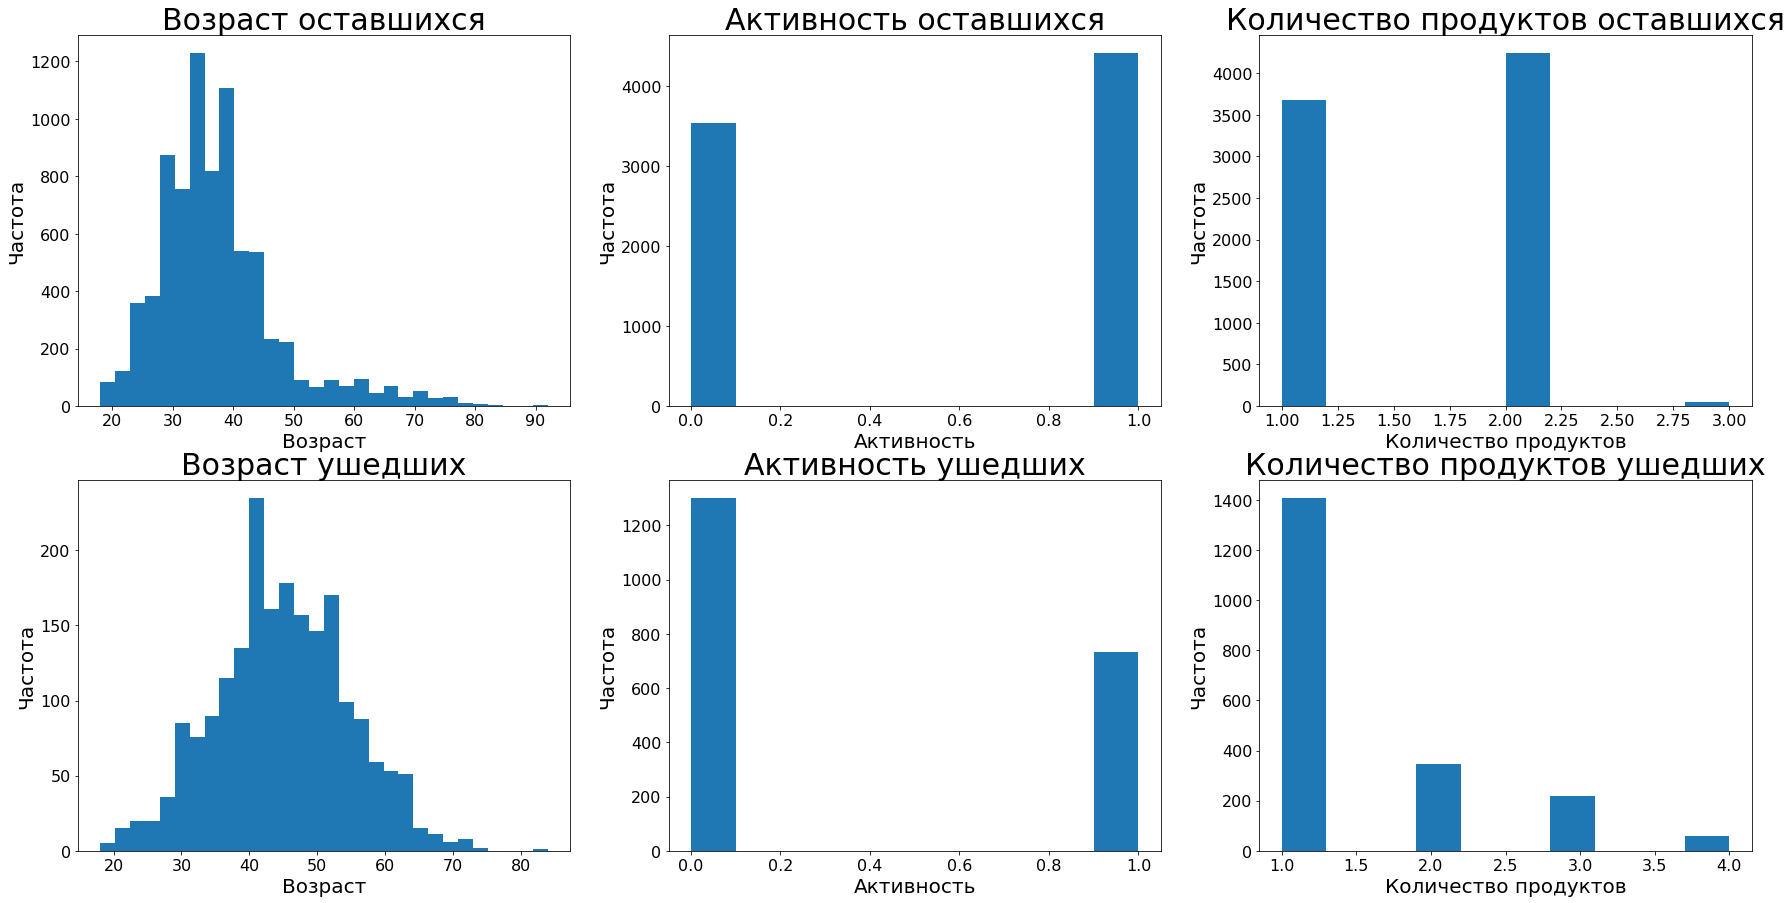

In [39]:
#Посмотрим распределение кредитного рейтинга по категориям зарплат
plt.figure(figsize=(30, 15))
plt.rcParams['font.size'] = '16'

plt.subplot(2, 3, 1)
plt.hist(stay['Age'], bins = 30)
plt.title("Возраст оставшихся", fontsize = 30) 
plt.xlabel('Возраст', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(2, 3, 4)
plt.hist(churn['Age'], bins = 30)
plt.title("Возраст ушедших", fontsize = 30)
plt.xlabel('Возраст', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(2, 3, 2)
plt.hist(stay['Loyalty'])
plt.title("Активность оставшихся", fontsize = 30)
plt.xlabel('Активность', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(2, 3, 5)
plt.hist(churn['Loyalty'])
plt.title("Активность ушедших", fontsize = 30)
plt.xlabel('Активность', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(2, 3, 3)
plt.hist(stay['Products'])
plt.title("Количество продуктов оставшихся", fontsize = 30)
plt.xlabel('Количество продуктов', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(2, 3, 6)
plt.hist(churn['Products'])
plt.title("Количество продуктов ушедших", fontsize = 30)
plt.xlabel('Количество продуктов', size=20)
plt.ylabel('Частота', size=20);

Выводы: <div>1.Более молодые склонны оставаться. <div>2.Среди активных больше оставшихся клиентов. <div>3.Оставшиеся клиенты использовали в основном 2 продукта в отличии от ушедших, которые использовали в основном 1 продукт и пробовали еще 3 других. 

Построим распределения по городам.

In [40]:
stay_city = stay.groupby('City')['userid'].count().reset_index()
churn_city = churn.groupby('City')['userid'].count().reset_index()

Text(0, 0.5, 'Частота')

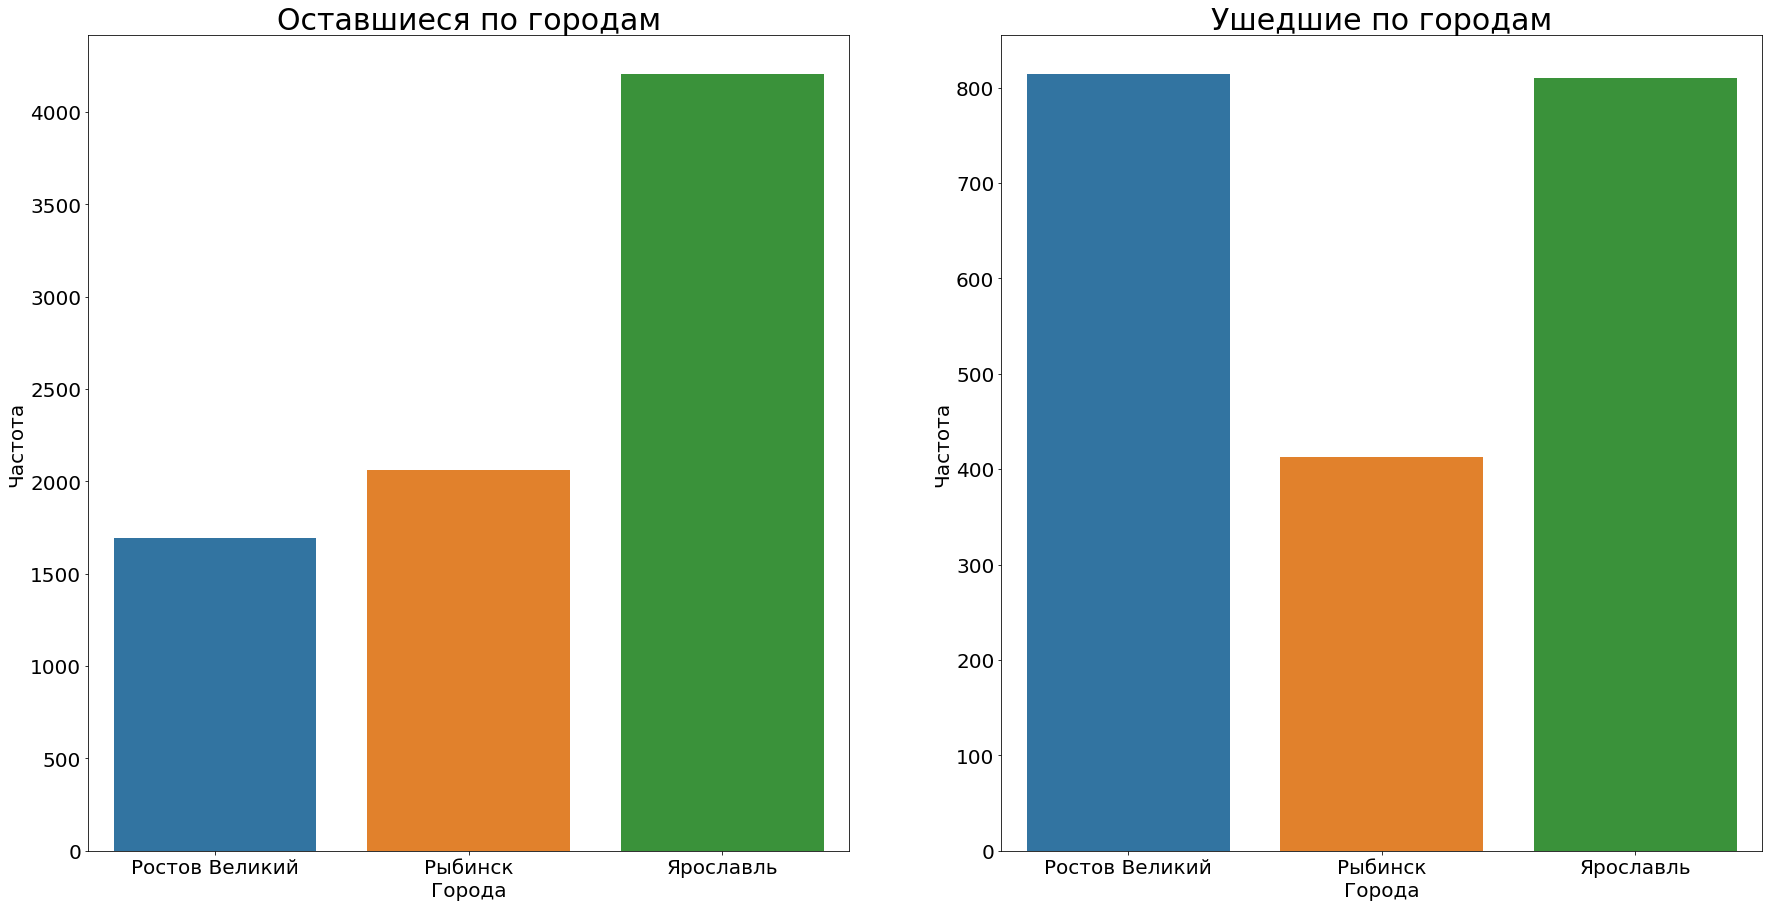

In [41]:
plt.figure(figsize=(30, 15))
plt.rcParams['font.size'] = '20'
plt.subplot(1, 2, 1)
sns.barplot(x= stay_city['City'], y = stay_city['userid'])
plt.title("Оставшиеся по городам", fontsize = 30) 
plt.xlabel('Города', size=20)
plt.ylabel('Частота', size=20)

plt.subplot(1, 2, 2)
sns.barplot(x= churn_city['City'], y = churn_city['userid'])
plt.title("Ушедшие по городам", fontsize = 30) 
plt.xlabel('Города', size=20)
plt.ylabel('Частота', size=20)

**Общие выводы по п.3 Исследовательского анализа:** <div> 1. Наибольшее различие по оттоку в возрастных категориях. Больше всего уходят в возрасте 45-65 лет (50% оттока). Более молодые склонны оставаться.<div> 2. Ростов Великий имеет уровень оттока больше, чем Рыбинск и Ярославль. <div> 3. Оставшиеся клиенты использовали в основном 2 продукта в отличии от ушедших, которые использовали в основном 1 продукт и пробовали еще 3 других.<div> 4. Среди активных больше оставшихся клиентов. <div> Эти 4 параметра можно наиболее значимы для описания портрета клиента. Для формулировки гипотезы возьмем возраст. 

# Шаг 3. Формулировка и проверка гипотез.


## 1. Сформулируем гипотезы.

<div>1. Гипотеза для зарплат:   Сформулируем нулевую гипотезу - средняя зарплата у ушедших клиентов и оставшихся одинакова.Альтернативная гипотеза - доходы уходящих и остающихся различаются.   
   <div>2. Гипотеза для возрастов: Сформулируем нулевую гипотезу - средний возраст тех, кто уходит и тех кто остается одинаковые. Альтернативная гипотеза - возраст уходящих и остающихся различается.   

## 2. Проверим гипотезы.

Определим насколько распределение данных похоже на нормальное.

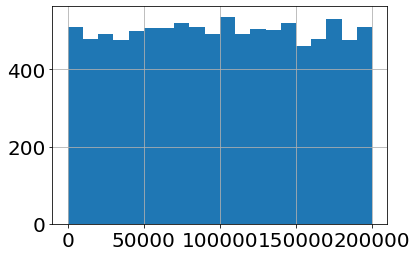

In [42]:
data['estimated_salary'].hist(bins = 20);

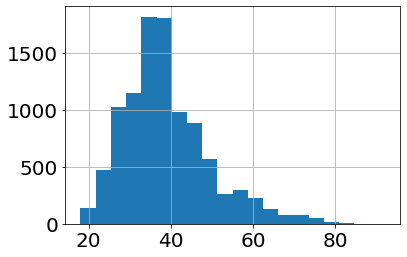

In [43]:
data['Age'].hist(bins = 20);

Распределение зарплаты похоже на равномерное. Утверждать, что распределение возраста нормльное сложно, т.к. данные скошены с положительной ассиметрией. Возможно это распределение Пуассона. Поэтому применим критерий Манна-Уитни для проверки гипотез. 

Здесь к.ф-м.н. Абакумовым В.Л. сказано https://www.youtube.com/watch?v=01PL0UG6ah8&t=8160s, что критерий Манна-Уитни проверяет не равенство средних, а проверяет равенство количества превышений значений в 2х столбцах. Поэтому нулевая гипотеза будет звучать так: зарплаты у ушедших и оставшихся превышают друг друга одинаковое количество раз. 

In [44]:
#Сделаем подвыборки для ушедших и оставшихся
sample_1 = data.query("Churn == 0")
sample_2 = data.query("Churn == 1")

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.mannwhitneyu(
    sample_1['estimated_salary'], 
    sample_2['estimated_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.11352575465076892
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза об одинаковом количестве превышений зарплаты у ушедших и оставшихся не опровергнута.

In [45]:
# проверим превышает ли возраст ушедших и оставшихся одинаковое количество раз
results = st.mannwhitneyu(
    sample_1['Age'], 
    sample_2['Age'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.6052007159685838e-230
Отвергаем нулевую гипотезу


Для возраста справедлива альтернативная гипотеза о том, что возраст ушедших и оставшихся превышает друг друга различное количество раз. 

# Выводы и рекомендации.

Выводы: <div>1. Портрет клиента склонного к оттоку следующий: возраст 45-65 лет, проживает в Ростове Великом и использует 1 продукт. 
    <div> 2. Наибольшее различие по оттоку в возрастных категориях. Более молодые склонны оставаться.<div> 3. Ростов Великий имеет уровень оттока больше, чем Рыбинск и Ярославль. <div> 4. Оставшиеся клиенты использовали в основном 2 продукта в отличии от ушедших, которые использовали в основном 1 продукт и пробовали еще 3 других.<div> 5. Среди активных больше оставшихся клиентов.
 <div>6. Клиенты у которых отсутствуют данные по балансу не склонны к оттоку. Те кто не указал баланс чаще пользуются двумя продуктами, а для всех данных частота использования 1о и 2х продуктов одинакова. 

Рекомендации: <div>1. Учитывая, что клиенты до 30 лет менее склонны к оттоку, то лучше сосредоточиться на этой возрастной категории. Продумать, чем их можно привлечь.
<div>2. Провести дополнительное исследование с целью выяснения повышенного оттока в Ростове Великом.
<div>3. Провести дополнительное исследование с целью выяснения какими продуктами преимущественно пользовались ушедшие клиенты и какими оставшиеся.
 <div>4. Выяснить какими преимущественно продуктами пользуются клиенты у которых отсутствуют данные по балансу.    